In [30]:
from IPython.display import display, Markdown
display(Markdown("[Data_Link](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data)"))

[Data_Link](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data)

In [31]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
%matplotlib inline

## Function and modules for the supervised Classification models

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm


## Function and modules for data analysis and model evaluation

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

## Function and modules for data preparation and visualization

In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf


In [35]:
sns.set()

## Loading Data

In [36]:
# Reading the dataset

data=pd.read_csv("germancredit.csv")
data

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,A14,12,A32,A42,1736,A61,A74,3,A92,...,4,A121,31,A143,A152,1,A172,1,A191,A201
996,0,A11,30,A32,A41,3857,A61,A73,4,A91,...,4,A122,40,A143,A152,1,A174,1,A192,A201
997,0,A14,12,A32,A43,804,A61,A75,4,A93,...,4,A123,38,A143,A152,1,A173,1,A191,A201
998,1,A11,45,A32,A43,1845,A61,A73,4,A93,...,4,A124,23,A143,A153,1,A173,1,A192,A201


In [37]:
''' 
Target Variable: Default
Predictors: duration, history, purpose, amount, savings etc.
Default = 1 means the loan was a good decision.
Default = 0 means the loan was a bad decision.

''' 

' \nTarget Variable: Default\nPredictors: duration, history, purpose, amount, savings etc.\nDefault = 1 means the loan was a good decision.\nDefault = 0 means the loan was a bad decision.\n\n'

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Default          1000 non-null   int64 
 1   checkingstatus1  1000 non-null   object
 2   duration         1000 non-null   int64 
 3   history          1000 non-null   object
 4   purpose          1000 non-null   object
 5   amount           1000 non-null   int64 
 6   savings          1000 non-null   object
 7   employ           1000 non-null   object
 8   installment      1000 non-null   int64 
 9   status           1000 non-null   object
 10  others           1000 non-null   object
 11  residence        1000 non-null   int64 
 12  property         1000 non-null   object
 13  age              1000 non-null   int64 
 14  otherplans       1000 non-null   object
 15  housing          1000 non-null   object
 16  cards            1000 non-null   int64 
 17  job              1000 non-null   o

In [39]:
data.describe()

,Default,duration,amount,installment,residence,age,cards,liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [40]:
data.isnull().sum()

Default            0
checkingstatus1    0
duration           0
history            0
purpose            0
amount             0
savings            0
employ             0
installment        0
status             0
others             0
residence          0
property           0
age                0
otherplans         0
housing            0
cards              0
job                0
liable             0
tele               0
foreign            0
dtype: int64

In [41]:
data.isna().sum()

Default            0
checkingstatus1    0
duration           0
history            0
purpose            0
amount             0
savings            0
employ             0
installment        0
status             0
others             0
residence          0
property           0
age                0
otherplans         0
housing            0
cards              0
job                0
liable             0
tele               0
foreign            0
dtype: int64

0    700
1    300
Name: Default, dtype: int64


<AxesSubplot:>

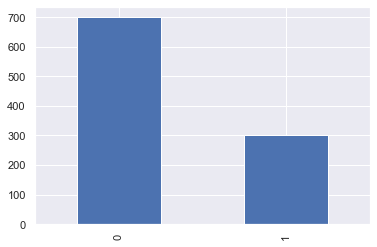

In [42]:
# # Creating Bar chart as the Target variable is Categorical

print(data["Default"].value_counts())
data["Default"].value_counts().plot(kind = 'bar')

# EDA

In [43]:
# Let's check the number of unique values in each column

data.nunique()

Default              2
checkingstatus1      4
duration            33
history              5
purpose             10
amount             921
savings              5
employ               5
installment          4
status               4
others               3
residence            4
property             4
age                 53
otherplans           3
housing              3
cards                4
job                  4
liable               2
tele                 2
foreign              2
dtype: int64

In [44]:
from sklearn.preprocessing import OrdinalEncoder
# Creating an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

cat_cols = data.select_dtypes(include = object).columns.tolist()

# Copying the dataframe to avoid changing the original one
data_encoded = data.copy()
# Encoding the categorical columns
data_encoded[cat_cols] = encoder.fit_transform(data[cat_cols])

data_encoded


,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,0.0,6,4.0,4.0,1169,4.0,4.0,4,2.0,...,4,0.0,67,2.0,1.0,2,2.0,1,1.0,0.0
1,1,1.0,48,2.0,4.0,5951,0.0,2.0,2,1.0,...,2,0.0,22,2.0,1.0,1,2.0,1,0.0,0.0
2,0,3.0,12,4.0,7.0,2096,0.0,3.0,2,2.0,...,3,0.0,49,2.0,1.0,1,1.0,2,0.0,0.0
3,0,0.0,42,2.0,3.0,7882,0.0,3.0,2,2.0,...,4,1.0,45,2.0,2.0,1,2.0,2,0.0,0.0
4,1,0.0,24,3.0,0.0,4870,0.0,2.0,3,2.0,...,4,3.0,53,2.0,2.0,2,2.0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,3.0,12,2.0,3.0,1736,0.0,3.0,3,1.0,...,4,0.0,31,2.0,1.0,1,1.0,1,0.0,0.0
996,0,0.0,30,2.0,1.0,3857,0.0,2.0,4,0.0,...,4,1.0,40,2.0,1.0,1,3.0,1,1.0,0.0
997,0,3.0,12,2.0,4.0,804,0.0,4.0,4,2.0,...,4,2.0,38,2.0,1.0,1,2.0,1,0.0,0.0
998,1,0.0,45,2.0,4.0,1845,0.0,2.0,4,2.0,...,4,3.0,23,2.0,2.0,1,2.0,1,1.0,0.0


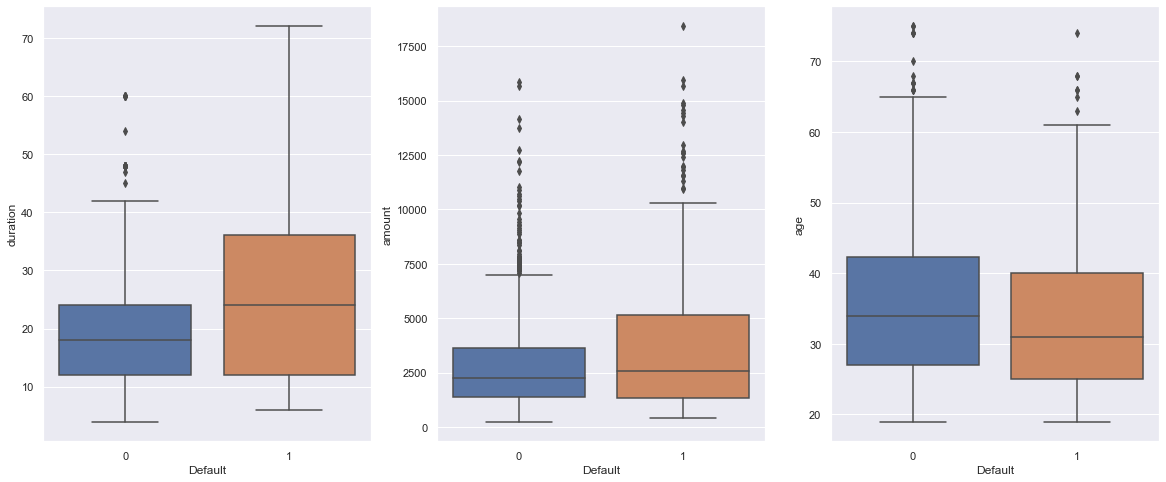

In [16]:
#Boxplots for quantitative predictors
#select only the numeric columns in the DataFrame
#quan_var = data.select_dtypes(include=np.number)
quan_var = ['duration', 'amount', 'age']
plt.figure(figsize=(20,8))
#data.boxplot(by = 'Default', column = ['duration'])
for i,name in enumerate(quan_var):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x = 'Default', y = name, data = data)

In [17]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

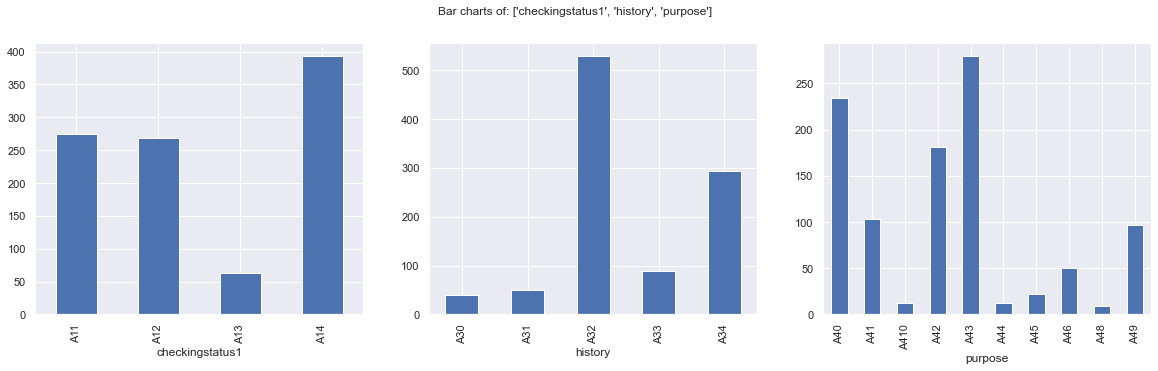

In [20]:
##barplots for qualitative predictors

qual_var = data.select_dtypes(include = object).columns.tolist()
qual_var.append('liable')

PlotBarCharts(inpData=data, 
              colsToPlot=qual_var[:3])

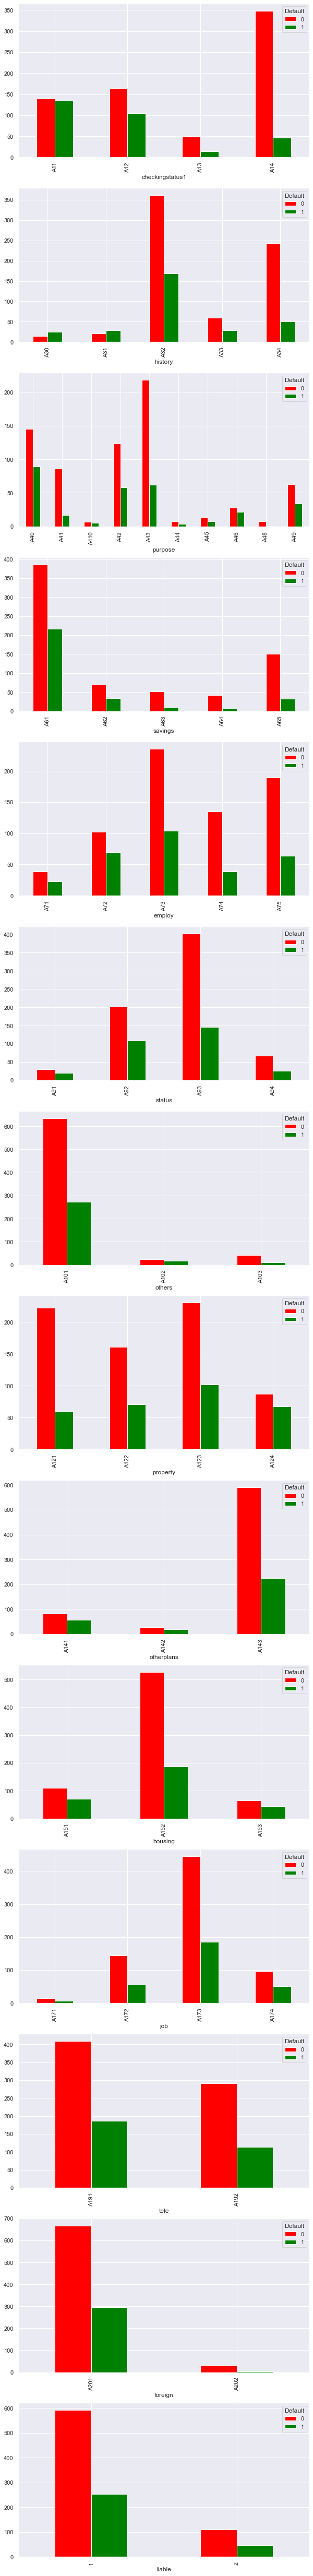

In [21]:
fig, PlotCanvas=plt.subplots(nrows=len(qual_var), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(qual_var, range(len(qual_var))):
    CrossTabResult=pd.crosstab(index=data[CategoricalCol], columns=data['Default'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i])


## Train-Test Split

In [107]:
data_encoded.head()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,0.0,6,4.0,4.0,1169,4.0,4.0,4,2.0,...,4,0.0,67,2.0,1.0,2,2.0,1,1.0,0.0
1,1,1.0,48,2.0,4.0,5951,0.0,2.0,2,1.0,...,2,0.0,22,2.0,1.0,1,2.0,1,0.0,0.0
2,0,3.0,12,4.0,7.0,2096,0.0,3.0,2,2.0,...,3,0.0,49,2.0,1.0,1,1.0,2,0.0,0.0
3,0,0.0,42,2.0,3.0,7882,0.0,3.0,2,2.0,...,4,1.0,45,2.0,2.0,1,2.0,2,0.0,0.0
4,1,0.0,24,3.0,0.0,4870,0.0,2.0,3,2.0,...,4,3.0,53,2.0,2.0,2,2.0,2,0.0,0.0


In [45]:
# input
x = data_encoded.iloc[:, 1:].values
 
# output
y = data_encoded.iloc[:, 0].values

#Spliting the data in 80:20 training to testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


# Scaling Data

In [46]:
#Applying MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape

(800, 20)

# ML Models

In [110]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(random_state=0)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis())) 
models.append(('AdaB', AdaBoostClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
models.append(('SVM', svm.SVC(C=2, kernel='rbf', gamma=0.1)))

In [111]:
models

[('LR', LogisticRegression()),
 ('NB', GaussianNB()),
 ('RF', RandomForestClassifier(random_state=0)),
 ('DT', DecisionTreeClassifier()),
 ('XGB',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None,
                enable_categorical=False, gamma=None, gpu_id=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, reg_alpha=None,
                reg_lambda=None, scale_pos_weight=None, subsample=None,
                tree_method=None, validate_parameters=None, verbosity=None)),
 ('LDA', LinearDiscriminantAnalysis()),
 ('QDA', QuadraticDiscriminantAnalysis()),
 ('AdaB', AdaBoostClassifier()),
 ('KNN', KNeighborsClassifier

# Model training and Testing

In [112]:
num_folds = 10
scoring = 'accuracy'


names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models: 
    names.append(name)
    ## k-fold analysis:
    kfold = KFold(n_splits=num_folds,shuffle=True, random_state= 10)
    #converted mean squared error to positive. The lower the better
    cv_results = 1* cross_val_score(model, x_train, y_train, cv=kfold, \
    scoring=scoring)
    kfold_results.append(cv_results)
    # Full Training period
    res = model.fit(x_train, y_train)
    train_result = accuracy_score(res.predict(x_train), y_train)*100
    train_results.append(train_result)
    # Test results
    test_result = accuracy_score(res.predict(x_test), y_test)*100
    test_results.append(test_result)

[18:48:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:48:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### Let’s compare the algorithms by looking at the cross validation results:

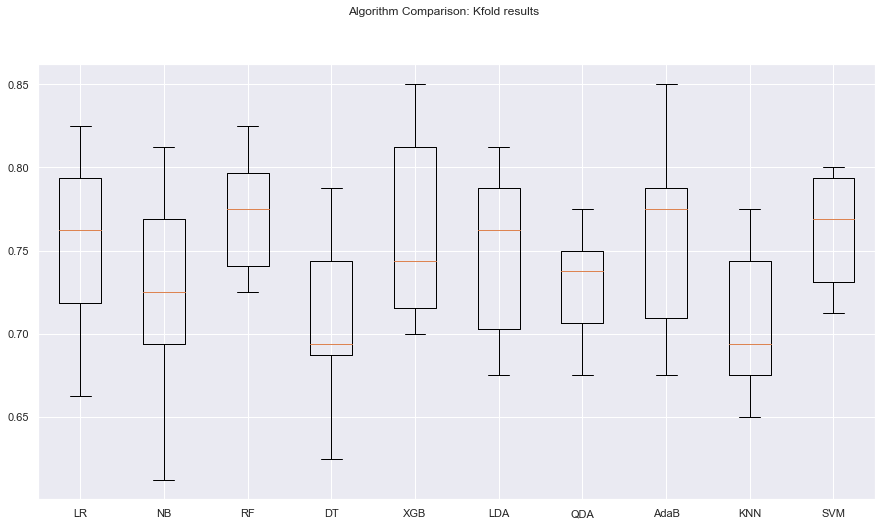

In [113]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

## Let us look at the accuracy of the test set as well

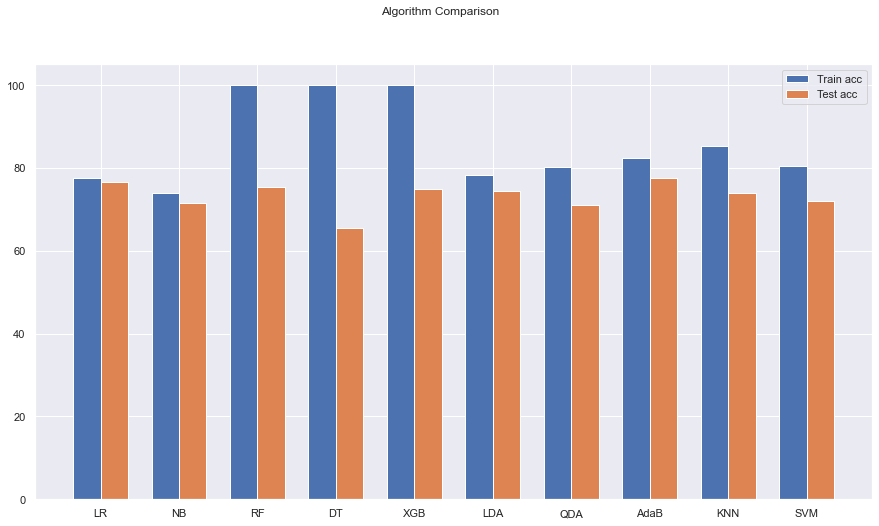

In [114]:
# compare algorithms
fig = pyplot.figure()
ind = np.arange(len(names)) # the x locations for the groups
width = 0.35 # the width of the bars
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results, width=width, label='Train acc')
pyplot.bar(ind + width/2, test_results, width=width, label='Test acc')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

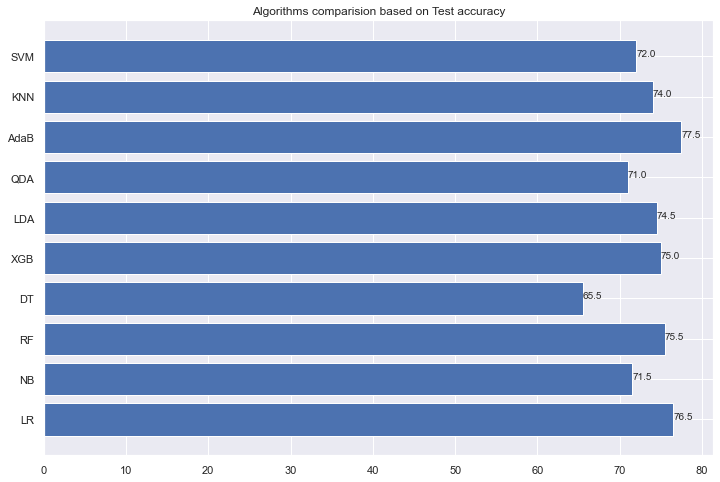

In [115]:
plt.figure(figsize = (12,8))
plt.barh(names, test_results)
 
for index, value in enumerate(test_results):
    plt.text(value, index,
             str(value))
plt.title("Algorithms comparision based on Test accuracy") 
plt.show()

# Features Selection by Chi-Square Test

In [116]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [117]:
# For all Columns
CategoricalVariablesList = data_encoded.columns.tolist()
FunctionChisq(inpData=data_encoded, TargetVariable='Default', CategoricalVariablesList=data_encoded.columns.tolist())

Default is correlated with Default | P-Value: 1.9413443913774672e-218
checkingstatus1 is correlated with Default | P-Value: 1.2189020722893755e-26
duration is correlated with Default | P-Value: 7.784571960945828e-06
history is correlated with Default | P-Value: 1.2791872956751013e-12
purpose is correlated with Default | P-Value: 0.00011574910079691586
amount is NOT correlated with Default | P-Value: 0.3865967855326757
savings is correlated with Default | P-Value: 2.7612142385682596e-07
employ is correlated with Default | P-Value: 0.0010454523491402541
installment is NOT correlated with Default | P-Value: 0.1400333122128481
status is correlated with Default | P-Value: 0.02223800546926877
others is correlated with Default | P-Value: 0.036055954027247226
residence is NOT correlated with Default | P-Value: 0.8615521320413175
property is correlated with Default | P-Value: 2.8584415733250017e-05
age is NOT correlated with Default | P-Value: 0.2795420590036425
otherplans is correlated with De

['Default',
 'checkingstatus1',
 'duration',
 'history',
 'purpose',
 'savings',
 'employ',
 'status',
 'others',
 'property',
 'otherplans',
 'housing',
 'foreign']

In [118]:
Corr_Var = ['checkingstatus1', 'duration', 'history', 'purpose', 'savings', 'employ','status','others','property','otherplans','housing','foreign' ]
X_Corr = data_encoded.loc[:, ['checkingstatus1', 'duration', 'history', 'purpose', 'savings', 'employ','status','others','property','otherplans','housing','foreign' ]]
Y_Corr = data_encoded.loc[:, ['Default']]


In [119]:
#Spliting the data in 80:20 training to testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_Corr, Y_Corr, test_size = 0.2, random_state = 0)

# Scaling

#Applying MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(800, 12)

In [120]:
num_folds = 10
scoring = 'accuracy'


names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models: 
    names.append(name)
    ## k-fold analysis:
    kfold = KFold(n_splits=num_folds,shuffle=True, random_state= 10)
    #converted mean squared error to positive. The lower the better
    cv_results = 1* cross_val_score(model, X_train, Y_train, cv=kfold, \
    scoring=scoring)
    kfold_results.append(cv_results)
    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = accuracy_score(res.predict(X_train), Y_train)*100
    train_results.append(train_result)
    # Test results
    test_result = accuracy_score(res.predict(X_test), Y_test)*100
    test_results.append(test_result)

[18:49:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:49:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:49:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:49:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

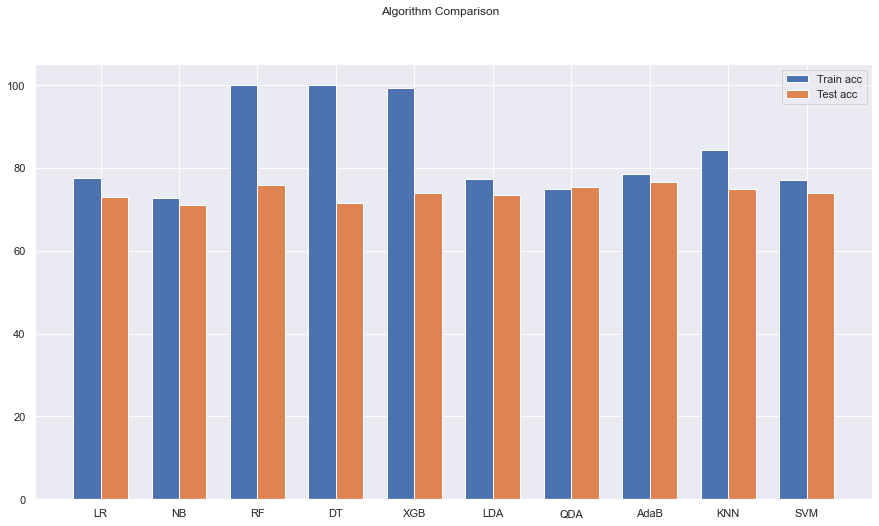

In [121]:
# compare algorithms
fig = pyplot.figure()
ind = np.arange(len(names)) # the x locations for the groups
width = 0.35 # the width of the bars
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results, width=width, label='Train acc')
pyplot.bar(ind + width/2, test_results, width=width, label='Test acc')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

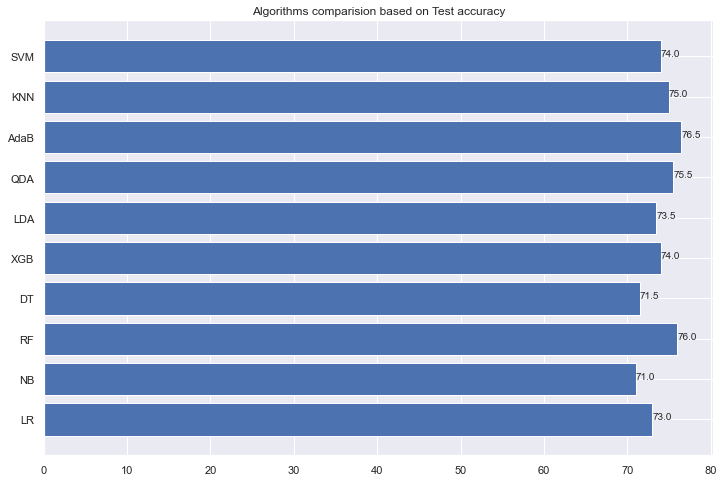

In [122]:
plt.figure(figsize = (12,8))
plt.barh(names, test_results)
 
for index, value in enumerate(test_results):
    plt.text(value, index,
             str(value))
plt.title("Algorithms comparision based on Test accuracy") 
plt.show()

## ANOVA

In [123]:
# Defining a function to find the statistical relationship with all  variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [124]:
# Calling the function to check which variables are correlated with target

FunctionAnova(inpData=data_encoded, TargetVariable='Default', ContinuousPredictorList=data_encoded.columns.tolist())

##### ANOVA Results ##### 

Default is correlated with Default | P-Value: 0.0
checkingstatus1 is correlated with Default | P-Value: 2.4416618064128288e-30
duration is correlated with Default | P-Value: 6.488049877187189e-12
history is correlated with Default | P-Value: 2.4230600689647656e-13
purpose is NOT correlated with Default | P-Value: 0.9618536879893452
amount is correlated with Default | P-Value: 8.797572373533373e-07
savings is correlated with Default | P-Value: 1.2147983456827244e-08
employ is correlated with Default | P-Value: 0.0002367939320576643
installment is correlated with Default | P-Value: 0.022035486306960176
status is correlated with Default | P-Value: 0.005261326205666935
others is NOT correlated with Default | P-Value: 0.427180494598151
residence is NOT correlated with Default | P-Value: 0.9253374212983783
property is correlated with Default | P-Value: 5.97405808733942e-06
age is correlated with Default | P-Value: 0.003925339398278295
otherplans is correlated with

['Default',
 'checkingstatus1',
 'duration',
 'history',
 'amount',
 'savings',
 'employ',
 'installment',
 'status',
 'property',
 'age',
 'otherplans',
 'foreign']

In [125]:
Corr_var = ['checkingstatus1', 'duration', 'history', 'amount', 'savings', 'employ','installment','status','property','age','otherplans','foreign' ]
x_Corr = data_encoded.loc[:, ['checkingstatus1', 'duration', 'history', 'amount', 'savings', 'employ','installment','status','property','age','otherplans','foreign' ]]
y_Corr = data_encoded.loc[:, ['Default']]


In [126]:
#Spliting the data in 80:20 training to testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x_Corr, y_Corr, test_size = 0.2, random_state = 0)

# Scaling

#Applying MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
Xtrain = scaler.fit_transform(x_train)
Xtest = scaler.transform(x_test)
Xtrain.shape

(800, 20)

In [127]:
num_folds = 10
scoring = 'accuracy'


names = []
kfold_results_Anova = []
test_results_Anova = []
train_results_Anova = []
for name, model in models: 
    names.append(name)
    ## k-fold analysis:
    kfold = KFold(n_splits=num_folds,shuffle=True, random_state= 10)
    #converted mean squared error to positive. The lower the better
    cv_results = 1* cross_val_score(model, Xtrain, Ytrain, cv=kfold, \
    scoring=scoring)
    kfold_results_Anova.append(cv_results)
    # Full Training period
    res = model.fit(Xtrain, Ytrain)
    train_result = accuracy_score(res.predict(Xtrain), Ytrain)*100
    train_results_Anova.append(train_result)
    # Test results
    test_result = accuracy_score(res.predict(Xtest), Ytest)*100
    test_results_Anova.append(test_result)

[18:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:49:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

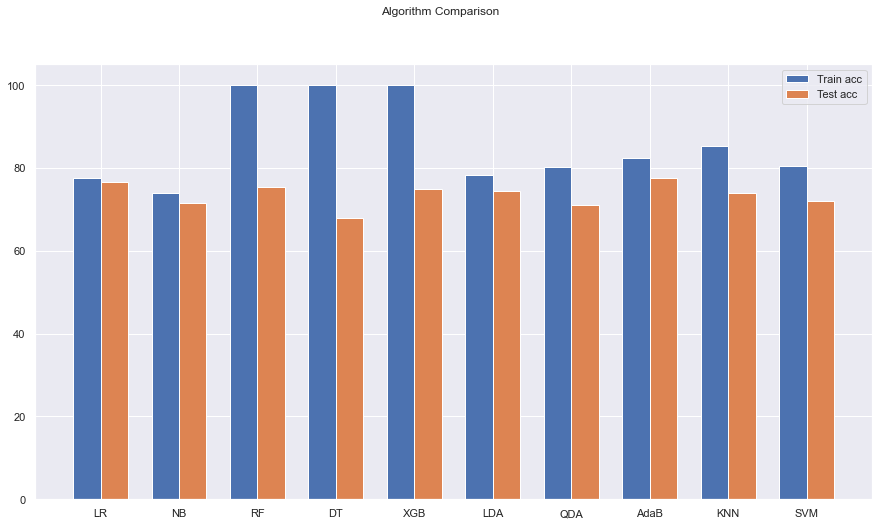

In [128]:
# compare algorithms
fig = pyplot.figure()
ind = np.arange(len(names)) # the x locations for the groups
width = 0.35 # the width of the bars
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results_Anova, width=width, label='Train acc')
pyplot.bar(ind + width/2, test_results_Anova, width=width, label='Test acc')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

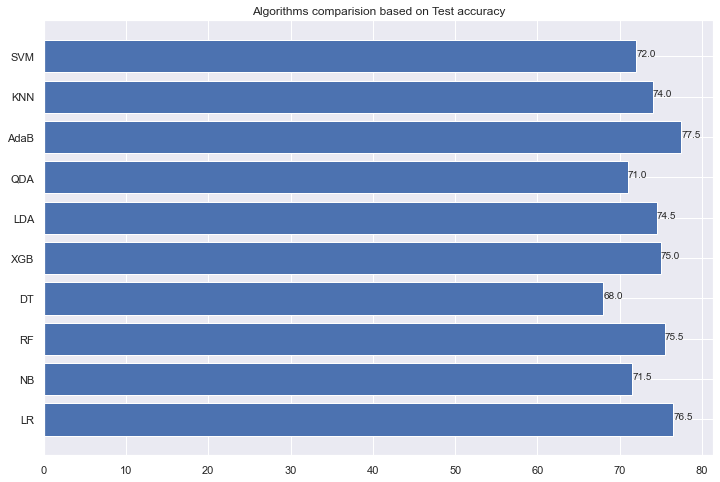

In [129]:
plt.figure(figsize = (12,8))
plt.barh(names, test_results_Anova)
 
for index, value in enumerate(test_results_Anova):
    plt.text(value, index,
             str(value))
plt.title("Algorithms comparision based on Test accuracy") 
plt.show()

## Select Logistic regression as the Best Model

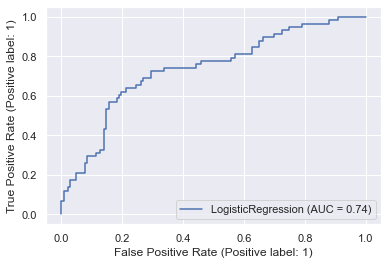

Logistic Regression model accuracy(in %): 76.5
              precision    recall  f1-score   support

           0     0.8276    0.8451    0.8362       142
           1     0.6000    0.5690    0.5841        58

    accuracy                         0.7650       200
   macro avg     0.7138    0.7070    0.7102       200
weighted avg     0.7616    0.7650    0.7631       200



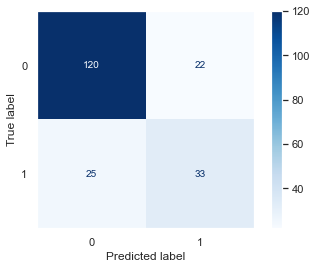

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

 
model_1 = LogisticRegression()

# fitting the model on the train data
model_1.fit(Xtrain, Ytrain)

from sklearn import metrics
metrics.plot_roc_curve(model_1, Xtest, Ytest)
plt.show()

predictions = model_1.predict(Xtest)
print("Logistic Regression model accuracy(in %):", accuracy_score(Ytest, predictions)*100)
plot_confusion_matrix(model_1,Xtest,Ytest,cmap='Blues')
plt.grid(False)

from sklearn.metrics import classification_report
print(classification_report(Ytest, predictions, digits = 4))

In [131]:
model_1.coef_

array([[-1.61982003,  1.77999882, -1.56775188, -0.10734385,  1.15541051,
        -0.93690145, -0.65274643,  0.84575253, -0.68257879, -0.70608491,
         0.02654097,  0.80664136, -0.26955544, -0.43730346, -0.81993888,
         0.53649035,  0.10099705,  0.3048576 , -0.34914887, -0.84062033]])

In [132]:
model_1.intercept_

array([1.11379478])

# Tuning the final Model

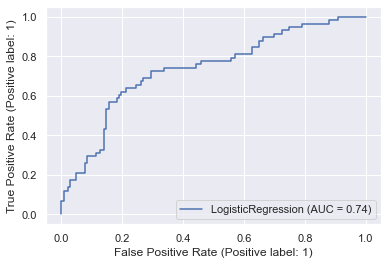

Logistic Regression model accuracy(in %): 76.5
              precision    recall  f1-score   support

           0     0.8276    0.8451    0.8362       142
           1     0.6000    0.5690    0.5841        58

    accuracy                         0.7650       200
   macro avg     0.7138    0.7070    0.7102       200
weighted avg     0.7616    0.7650    0.7631       200



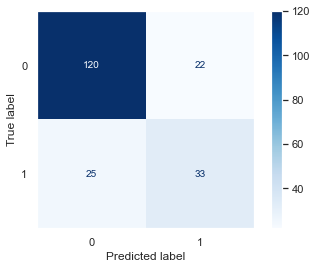

In [133]:

model_1 = LogisticRegression(penalty='l2',tol=0.0005, max_iter=1000 )
# fitting the model on the train data
model_1.fit(Xtrain, Ytrain)

from sklearn import metrics
metrics.plot_roc_curve(model_1, Xtest, Ytest)
plt.show()

predictions = model_1.predict(Xtest)
print("Logistic Regression model accuracy(in %):", accuracy_score(Ytest, predictions)*100)
plot_confusion_matrix(model_1,Xtest,Ytest,cmap='Blues')
plt.grid(False)

from sklearn.metrics import classification_report
print(classification_report(Ytest, predictions, digits = 4))



# Appy Deep Learning

## Setting-01

In [48]:
from  tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)



In [49]:
# define network architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
import keras

MLP = Sequential()
MLP.add(InputLayer(input_shape=(20, ))) # input layer
MLP.add(Dense(256, activation='relu')) # hidden layer 1
MLP.add(Dense(256, activation='relu')) # hidden layer 2
MLP.add(Dense(2, activation='sigmoid')) # output layer

# summary
MLP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5376      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 71682 (280.01 KB)
Trainable params: 71682 (280.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
loss = keras.losses.BinaryCrossentropy() # again without logits
# optimization
MLP.compile(loss=loss, optimizer='adam', metrics=['accuracy'])

In [51]:


h = MLP.fit(x_train, y_train, batch_size= 32, epochs=1000, shuffle=True, verbose=1, validation_data = (x_test, y_test))


Epoch 1/1000
25/25 [==============================] - 2s 21ms/step - loss: 0.6022 - accuracy: 0.6750 - val_loss: 0.5494 - val_accuracy: 0.7100
Epoch 2/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.5209 - accuracy: 0.7250 - val_loss: 0.5176 - val_accuracy: 0.7350
Epoch 3/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.4866 - accuracy: 0.7675 - val_loss: 0.5435 - val_accuracy: 0.7350
Epoch 4/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.4687 - accuracy: 0.7763 - val_loss: 0.5267 - val_accuracy: 0.7300
Epoch 5/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.4535 - accuracy: 0.7900 - val_loss: 0.5294 - val_accuracy: 0.7300
Epoch 6/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4464 - accuracy: 0.7925 - val_loss: 0.5276 - val_accuracy: 0.7350
Epoch 7/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.4475 - accuracy: 0.7925 - val_loss: 0.5290 - val_accuracy: 0.7450
Epoch

25/25 [==============================] - 0s 6ms/step - loss: 0.0277 - accuracy: 0.9975 - val_loss: 1.1661 - val_accuracy: 0.7300
Epoch 59/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0234 - accuracy: 0.9987 - val_loss: 1.2006 - val_accuracy: 0.7350
Epoch 60/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0236 - accuracy: 0.9987 - val_loss: 1.2163 - val_accuracy: 0.7400
Epoch 61/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0198 - accuracy: 0.9987 - val_loss: 1.2291 - val_accuracy: 0.7450
Epoch 62/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0226 - accuracy: 0.9987 - val_loss: 1.2636 - val_accuracy: 0.7400
Epoch 63/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0194 - accuracy: 0.9987 - val_loss: 1.2621 - val_accuracy: 0.7400
Epoch 64/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 1.2704 - val_accuracy: 0.7500
Epoch 65/1000

25/25 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.8170 - val_accuracy: 0.7450
Epoch 116/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.8243 - val_accuracy: 0.7450
Epoch 117/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.8474 - val_accuracy: 0.7400
Epoch 118/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.8382 - val_accuracy: 0.7450
Epoch 119/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.8455 - val_accuracy: 0.7400
Epoch 120/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.8541 - val_accuracy: 0.7400
Epoch 121/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.8647 - val_accuracy: 0.7400
Epoch 1

Epoch 171/1000
25/25 [==============================] - 0s 7ms/step - loss: 4.0417e-04 - accuracy: 1.0000 - val_loss: 2.1797 - val_accuracy: 0.7350
Epoch 172/1000
25/25 [==============================] - 0s 7ms/step - loss: 3.8482e-04 - accuracy: 1.0000 - val_loss: 2.1783 - val_accuracy: 0.7350
Epoch 173/1000
25/25 [==============================] - 0s 7ms/step - loss: 3.6544e-04 - accuracy: 1.0000 - val_loss: 2.1843 - val_accuracy: 0.7350
Epoch 174/1000
25/25 [==============================] - 0s 7ms/step - loss: 3.6975e-04 - accuracy: 1.0000 - val_loss: 2.1942 - val_accuracy: 0.7400
Epoch 175/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.6478e-04 - accuracy: 1.0000 - val_loss: 2.2037 - val_accuracy: 0.7350
Epoch 176/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.4358e-04 - accuracy: 1.0000 - val_loss: 2.2047 - val_accuracy: 0.7350
Epoch 177/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.4218e-04 - accuracy: 1.0000 - val_

25/25 [==============================] - 0s 6ms/step - loss: 1.3759e-04 - accuracy: 1.0000 - val_loss: 2.4572 - val_accuracy: 0.7400
Epoch 227/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.4039e-04 - accuracy: 1.0000 - val_loss: 2.4618 - val_accuracy: 0.7300
Epoch 228/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.3020e-04 - accuracy: 1.0000 - val_loss: 2.4685 - val_accuracy: 0.7300
Epoch 229/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.2019e-04 - accuracy: 1.0000 - val_loss: 2.4776 - val_accuracy: 0.7350
Epoch 230/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.2228e-04 - accuracy: 1.0000 - val_loss: 2.4808 - val_accuracy: 0.7300
Epoch 231/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.2146e-04 - accuracy: 1.0000 - val_loss: 2.4871 - val_accuracy: 0.7350
Epoch 232/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.1727e-04 - accuracy: 1.0000 - val_loss: 2.4874 - 

25/25 [==============================] - 0s 6ms/step - loss: 4.8648e-05 - accuracy: 1.0000 - val_loss: 2.7188 - val_accuracy: 0.7300
Epoch 282/1000
25/25 [==============================] - 0s 7ms/step - loss: 4.9092e-05 - accuracy: 1.0000 - val_loss: 2.7287 - val_accuracy: 0.7300
Epoch 283/1000
25/25 [==============================] - 0s 6ms/step - loss: 4.8438e-05 - accuracy: 1.0000 - val_loss: 2.7338 - val_accuracy: 0.7300
Epoch 284/1000
25/25 [==============================] - 0s 7ms/step - loss: 4.6778e-05 - accuracy: 1.0000 - val_loss: 2.7330 - val_accuracy: 0.7300
Epoch 285/1000
25/25 [==============================] - 0s 6ms/step - loss: 4.5943e-05 - accuracy: 1.0000 - val_loss: 2.7443 - val_accuracy: 0.7250
Epoch 286/1000
25/25 [==============================] - 0s 6ms/step - loss: 4.5595e-05 - accuracy: 1.0000 - val_loss: 2.7406 - val_accuracy: 0.7300
Epoch 287/1000
25/25 [==============================] - 0s 6ms/step - loss: 4.3405e-05 - accuracy: 1.0000 - val_loss: 2.7476 - 

25/25 [==============================] - 0s 6ms/step - loss: 2.0055e-05 - accuracy: 1.0000 - val_loss: 2.9604 - val_accuracy: 0.7300
Epoch 337/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.9341e-05 - accuracy: 1.0000 - val_loss: 2.9588 - val_accuracy: 0.7300
Epoch 338/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.9405e-05 - accuracy: 1.0000 - val_loss: 2.9638 - val_accuracy: 0.7300
Epoch 339/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.8874e-05 - accuracy: 1.0000 - val_loss: 2.9673 - val_accuracy: 0.7300
Epoch 340/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.9009e-05 - accuracy: 1.0000 - val_loss: 2.9708 - val_accuracy: 0.7350
Epoch 341/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.9600e-05 - accuracy: 1.0000 - val_loss: 2.9812 - val_accuracy: 0.7300
Epoch 342/1000
25/25 [==============================] - 0s 7ms/step - loss: 1.8271e-05 - accuracy: 1.0000 - val_loss: 2.9733 - 

25/25 [==============================] - 0s 6ms/step - loss: 8.3897e-06 - accuracy: 1.0000 - val_loss: 3.1739 - val_accuracy: 0.7300
Epoch 392/1000
25/25 [==============================] - 0s 7ms/step - loss: 7.9956e-06 - accuracy: 1.0000 - val_loss: 3.1799 - val_accuracy: 0.7350
Epoch 393/1000
25/25 [==============================] - 0s 6ms/step - loss: 8.2808e-06 - accuracy: 1.0000 - val_loss: 3.1893 - val_accuracy: 0.7350
Epoch 394/1000
25/25 [==============================] - 0s 6ms/step - loss: 8.4036e-06 - accuracy: 1.0000 - val_loss: 3.1848 - val_accuracy: 0.7300
Epoch 395/1000
25/25 [==============================] - 0s 6ms/step - loss: 8.2323e-06 - accuracy: 1.0000 - val_loss: 3.1763 - val_accuracy: 0.7350
Epoch 396/1000
25/25 [==============================] - 0s 5ms/step - loss: 8.0662e-06 - accuracy: 1.0000 - val_loss: 3.1917 - val_accuracy: 0.7300
Epoch 397/1000
25/25 [==============================] - 0s 6ms/step - loss: 7.8627e-06 - accuracy: 1.0000 - val_loss: 3.2048 - 

25/25 [==============================] - 0s 6ms/step - loss: 3.6129e-06 - accuracy: 1.0000 - val_loss: 3.3882 - val_accuracy: 0.7300
Epoch 447/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.6126e-06 - accuracy: 1.0000 - val_loss: 3.3878 - val_accuracy: 0.7300
Epoch 448/1000
25/25 [==============================] - 0s 7ms/step - loss: 3.5295e-06 - accuracy: 1.0000 - val_loss: 3.3920 - val_accuracy: 0.7300
Epoch 449/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.5696e-06 - accuracy: 1.0000 - val_loss: 3.3891 - val_accuracy: 0.7350
Epoch 450/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.4423e-06 - accuracy: 1.0000 - val_loss: 3.3955 - val_accuracy: 0.7300
Epoch 451/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.3998e-06 - accuracy: 1.0000 - val_loss: 3.3954 - val_accuracy: 0.7300
Epoch 452/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.3891e-06 - accuracy: 1.0000 - val_loss: 3.4035 - 

25/25 [==============================] - 0s 6ms/step - loss: 1.6636e-06 - accuracy: 1.0000 - val_loss: 3.5796 - val_accuracy: 0.7300
Epoch 502/1000
25/25 [==============================] - 0s 7ms/step - loss: 1.6341e-06 - accuracy: 1.0000 - val_loss: 3.5795 - val_accuracy: 0.7300
Epoch 503/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.6224e-06 - accuracy: 1.0000 - val_loss: 3.5824 - val_accuracy: 0.7300
Epoch 504/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.6457e-06 - accuracy: 1.0000 - val_loss: 3.5872 - val_accuracy: 0.7300
Epoch 505/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.5357e-06 - accuracy: 1.0000 - val_loss: 3.5997 - val_accuracy: 0.7300
Epoch 506/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.5452e-06 - accuracy: 1.0000 - val_loss: 3.5936 - val_accuracy: 0.7300
Epoch 507/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.4539e-06 - accuracy: 1.0000 - val_loss: 3.6034 - 

25/25 [==============================] - 0s 5ms/step - loss: 7.7974e-07 - accuracy: 1.0000 - val_loss: 3.7631 - val_accuracy: 0.7300
Epoch 557/1000
25/25 [==============================] - 0s 5ms/step - loss: 7.3714e-07 - accuracy: 1.0000 - val_loss: 3.7718 - val_accuracy: 0.7300
Epoch 558/1000
25/25 [==============================] - 0s 5ms/step - loss: 7.2609e-07 - accuracy: 1.0000 - val_loss: 3.7769 - val_accuracy: 0.7300
Epoch 559/1000
25/25 [==============================] - 0s 6ms/step - loss: 7.1503e-07 - accuracy: 1.0000 - val_loss: 3.7736 - val_accuracy: 0.7300
Epoch 560/1000
25/25 [==============================] - 0s 7ms/step - loss: 7.1995e-07 - accuracy: 1.0000 - val_loss: 3.7836 - val_accuracy: 0.7250
Epoch 561/1000
25/25 [==============================] - 0s 6ms/step - loss: 6.9208e-07 - accuracy: 1.0000 - val_loss: 3.7796 - val_accuracy: 0.7300
Epoch 562/1000
25/25 [==============================] - 0s 6ms/step - loss: 7.0047e-07 - accuracy: 1.0000 - val_loss: 3.7843 - 

25/25 [==============================] - 0s 6ms/step - loss: 3.6507e-07 - accuracy: 1.0000 - val_loss: 3.9464 - val_accuracy: 0.7300
Epoch 612/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.5541e-07 - accuracy: 1.0000 - val_loss: 3.9494 - val_accuracy: 0.7300
Epoch 613/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.5264e-07 - accuracy: 1.0000 - val_loss: 3.9542 - val_accuracy: 0.7300
Epoch 614/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.5053e-07 - accuracy: 1.0000 - val_loss: 3.9716 - val_accuracy: 0.7250
Epoch 615/1000
25/25 [==============================] - 0s 7ms/step - loss: 3.7649e-07 - accuracy: 1.0000 - val_loss: 3.9760 - val_accuracy: 0.7250
Epoch 616/1000
25/25 [==============================] - 0s 7ms/step - loss: 3.4616e-07 - accuracy: 1.0000 - val_loss: 3.9596 - val_accuracy: 0.7300
Epoch 617/1000
25/25 [==============================] - 0s 7ms/step - loss: 3.4187e-07 - accuracy: 1.0000 - val_loss: 3.9713 - 

25/25 [==============================] - 0s 6ms/step - loss: 1.8616e-07 - accuracy: 1.0000 - val_loss: 4.1130 - val_accuracy: 0.7300
Epoch 667/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.8302e-07 - accuracy: 1.0000 - val_loss: 4.1155 - val_accuracy: 0.7250
Epoch 668/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.7944e-07 - accuracy: 1.0000 - val_loss: 4.1230 - val_accuracy: 0.7250
Epoch 669/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.8198e-07 - accuracy: 1.0000 - val_loss: 4.1250 - val_accuracy: 0.7250
Epoch 670/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.7658e-07 - accuracy: 1.0000 - val_loss: 4.1278 - val_accuracy: 0.7250
Epoch 671/1000
25/25 [==============================] - 0s 8ms/step - loss: 1.7484e-07 - accuracy: 1.0000 - val_loss: 4.1307 - val_accuracy: 0.7250
Epoch 672/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.7295e-07 - accuracy: 1.0000 - val_loss: 4.1391 - 

25/25 [==============================] - 0s 6ms/step - loss: 1.0074e-07 - accuracy: 1.0000 - val_loss: 4.2713 - val_accuracy: 0.7250
Epoch 722/1000
25/25 [==============================] - 0s 6ms/step - loss: 9.5976e-08 - accuracy: 1.0000 - val_loss: 4.2772 - val_accuracy: 0.7250
Epoch 723/1000
25/25 [==============================] - 0s 6ms/step - loss: 9.7896e-08 - accuracy: 1.0000 - val_loss: 4.2836 - val_accuracy: 0.7250
Epoch 724/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.0189e-07 - accuracy: 1.0000 - val_loss: 4.2753 - val_accuracy: 0.7250
Epoch 725/1000
25/25 [==============================] - 0s 7ms/step - loss: 9.8824e-08 - accuracy: 1.0000 - val_loss: 4.2763 - val_accuracy: 0.7300
Epoch 726/1000
25/25 [==============================] - 0s 6ms/step - loss: 9.4995e-08 - accuracy: 1.0000 - val_loss: 4.2872 - val_accuracy: 0.7250
Epoch 727/1000
25/25 [==============================] - 0s 6ms/step - loss: 9.3956e-08 - accuracy: 1.0000 - val_loss: 4.2846 - 

25/25 [==============================] - 0s 6ms/step - loss: 5.4906e-08 - accuracy: 1.0000 - val_loss: 4.4097 - val_accuracy: 0.7300
Epoch 777/1000
25/25 [==============================] - 0s 5ms/step - loss: 5.2238e-08 - accuracy: 1.0000 - val_loss: 4.4112 - val_accuracy: 0.7300
Epoch 778/1000
25/25 [==============================] - 0s 6ms/step - loss: 5.1700e-08 - accuracy: 1.0000 - val_loss: 4.4204 - val_accuracy: 0.7250
Epoch 779/1000
25/25 [==============================] - 0s 6ms/step - loss: 5.2074e-08 - accuracy: 1.0000 - val_loss: 4.4232 - val_accuracy: 0.7250
Epoch 780/1000
25/25 [==============================] - 0s 6ms/step - loss: 5.2193e-08 - accuracy: 1.0000 - val_loss: 4.4294 - val_accuracy: 0.7250
Epoch 781/1000
25/25 [==============================] - 0s 6ms/step - loss: 5.3613e-08 - accuracy: 1.0000 - val_loss: 4.4160 - val_accuracy: 0.7250
Epoch 782/1000
25/25 [==============================] - 0s 6ms/step - loss: 4.9909e-08 - accuracy: 1.0000 - val_loss: 4.4289 - 

25/25 [==============================] - 0s 5ms/step - loss: 2.9401e-08 - accuracy: 1.0000 - val_loss: 4.5399 - val_accuracy: 0.7250
Epoch 832/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.8959e-08 - accuracy: 1.0000 - val_loss: 4.5425 - val_accuracy: 0.7300
Epoch 833/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.9288e-08 - accuracy: 1.0000 - val_loss: 4.5370 - val_accuracy: 0.7250
Epoch 834/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.8258e-08 - accuracy: 1.0000 - val_loss: 4.5451 - val_accuracy: 0.7300
Epoch 835/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.9513e-08 - accuracy: 1.0000 - val_loss: 4.5550 - val_accuracy: 0.7300
Epoch 836/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.9733e-08 - accuracy: 1.0000 - val_loss: 4.5532 - val_accuracy: 0.7300
Epoch 837/1000
25/25 [==============================] - 0s 4ms/step - loss: 3.0789e-08 - accuracy: 1.0000 - val_loss: 4.5489 - 

25/25 [==============================] - 0s 5ms/step - loss: 1.8097e-08 - accuracy: 1.0000 - val_loss: 4.6492 - val_accuracy: 0.7250
Epoch 887/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.7377e-08 - accuracy: 1.0000 - val_loss: 4.6636 - val_accuracy: 0.7300
Epoch 888/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.9316e-08 - accuracy: 1.0000 - val_loss: 4.6564 - val_accuracy: 0.7300
Epoch 889/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.9907e-08 - accuracy: 1.0000 - val_loss: 4.6602 - val_accuracy: 0.7300
Epoch 890/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.7832e-08 - accuracy: 1.0000 - val_loss: 4.6675 - val_accuracy: 0.7300
Epoch 891/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.7063e-08 - accuracy: 1.0000 - val_loss: 4.6680 - val_accuracy: 0.7250
Epoch 892/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.6779e-08 - accuracy: 1.0000 - val_loss: 4.6705 - 

25/25 [==============================] - 0s 5ms/step - loss: 1.1466e-08 - accuracy: 1.0000 - val_loss: 4.7485 - val_accuracy: 0.7250
Epoch 942/1000
25/25 [==============================] - 0s 7ms/step - loss: 1.1564e-08 - accuracy: 1.0000 - val_loss: 4.7689 - val_accuracy: 0.7250
Epoch 943/1000
25/25 [==============================] - 0s 7ms/step - loss: 1.1879e-08 - accuracy: 1.0000 - val_loss: 4.7539 - val_accuracy: 0.7250
Epoch 944/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.1111e-08 - accuracy: 1.0000 - val_loss: 4.7640 - val_accuracy: 0.7250
Epoch 945/1000
25/25 [==============================] - 0s 7ms/step - loss: 1.1003e-08 - accuracy: 1.0000 - val_loss: 4.7564 - val_accuracy: 0.7250
Epoch 946/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.0602e-08 - accuracy: 1.0000 - val_loss: 4.7518 - val_accuracy: 0.7250
Epoch 947/1000
25/25 [==============================] - 0s 7ms/step - loss: 1.0861e-08 - accuracy: 1.0000 - val_loss: 4.7670 - 

25/25 [==============================] - 0s 6ms/step - loss: 8.0464e-09 - accuracy: 1.0000 - val_loss: 4.8427 - val_accuracy: 0.7250
Epoch 997/1000
25/25 [==============================] - 0s 6ms/step - loss: 7.5261e-09 - accuracy: 1.0000 - val_loss: 4.8438 - val_accuracy: 0.7250
Epoch 998/1000
25/25 [==============================] - 0s 6ms/step - loss: 7.4181e-09 - accuracy: 1.0000 - val_loss: 4.8442 - val_accuracy: 0.7250
Epoch 999/1000
25/25 [==============================] - 0s 5ms/step - loss: 7.4747e-09 - accuracy: 1.0000 - val_loss: 4.8342 - val_accuracy: 0.7250
Epoch 1000/1000
25/25 [==============================] - 0s 6ms/step - loss: 7.7563e-09 - accuracy: 1.0000 - val_loss: 4.8502 - val_accuracy: 0.7250


In [52]:
max(h.history['val_accuracy'])

0.7699999809265137

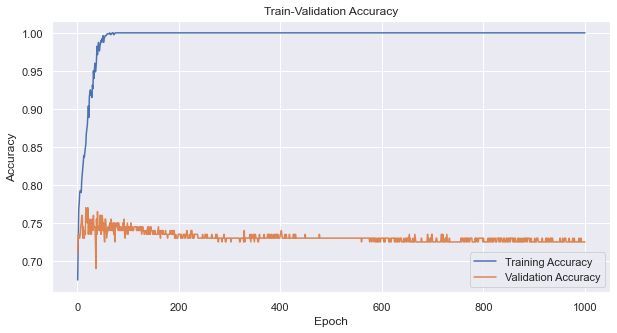

In [53]:
figure = plt.gcf()
figure.set_size_inches((10, 5))
plt.title('Train-Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(range(1, len(h.history['accuracy']) + 1), h.history['accuracy'])
plt.plot(range(1, len(h.history['val_accuracy']) + 1), h.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()


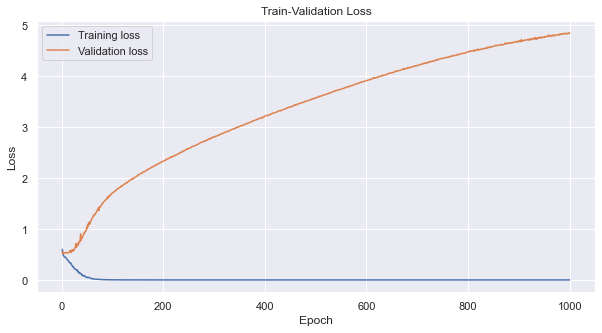

In [54]:
figure = plt.gcf()
figure.set_size_inches((10, 5))
plt.title('Train-Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(h.history['loss']) + 1), h.history['loss'])
plt.plot(range(1, len(h.history['val_loss']) + 1), h.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.show()


## 2nd Setting

In [55]:
import keras
from keras.layers import Dense, Flatten 
from  tensorflow.keras.utils import to_categorical


model = keras.models.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='tanh'),
  keras.layers.Dense(128, activation='tanh'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(2, activation='sigmoid')
])

loss = keras.losses.BinaryCrossentropy() # again without logits

#optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer= 'adam', metrics=metrics)

h = model.fit(x_train, y_train, batch_size= 32, epochs=1000, shuffle=True, verbose=1, validation_data = (x_test, y_test))





Epoch 1/1000
25/25 [==============================] - 1s 14ms/step - loss: 0.5942 - accuracy: 0.6900 - val_loss: 0.5361 - val_accuracy: 0.7300
Epoch 2/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.5134 - accuracy: 0.7525 - val_loss: 0.5212 - val_accuracy: 0.7350
Epoch 3/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4910 - accuracy: 0.7638 - val_loss: 0.5265 - val_accuracy: 0.7100
Epoch 4/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4809 - accuracy: 0.7763 - val_loss: 0.5360 - val_accuracy: 0.7250
Epoch 5/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4822 - accuracy: 0.7800 - val_loss: 0.5657 - val_accuracy: 0.7450
Epoch 6/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4810 - accuracy: 0.7850 - val_loss: 0.5619 - val_accuracy: 0.7400
Epoch 7/1000
25/25 [==============================] - 0s 9ms/step - loss: 0.4845 - accuracy: 0.7688 - val_loss: 0.5522 - val_accuracy: 0.7300
Epoch

25/25 [==============================] - 0s 5ms/step - loss: 0.4543 - accuracy: 0.7788 - val_loss: 0.5413 - val_accuracy: 0.7650
Epoch 59/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4569 - accuracy: 0.7850 - val_loss: 0.5434 - val_accuracy: 0.7550
Epoch 60/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4528 - accuracy: 0.7887 - val_loss: 0.5382 - val_accuracy: 0.7650
Epoch 61/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4533 - accuracy: 0.7812 - val_loss: 0.5433 - val_accuracy: 0.7650
Epoch 62/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.4562 - accuracy: 0.7788 - val_loss: 0.5393 - val_accuracy: 0.7650
Epoch 63/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4485 - accuracy: 0.7800 - val_loss: 0.5413 - val_accuracy: 0.7600
Epoch 64/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4588 - accuracy: 0.7850 - val_loss: 0.5570 - val_accuracy: 0.7550
Epoch 65/1000

25/25 [==============================] - 0s 6ms/step - loss: 0.4101 - accuracy: 0.8188 - val_loss: 0.5441 - val_accuracy: 0.7400
Epoch 116/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4108 - accuracy: 0.8213 - val_loss: 0.5479 - val_accuracy: 0.7450
Epoch 117/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4166 - accuracy: 0.8087 - val_loss: 0.5441 - val_accuracy: 0.7450
Epoch 118/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4050 - accuracy: 0.8200 - val_loss: 0.5477 - val_accuracy: 0.7500
Epoch 119/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4094 - accuracy: 0.8213 - val_loss: 0.5470 - val_accuracy: 0.7500
Epoch 120/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4205 - accuracy: 0.8087 - val_loss: 0.5460 - val_accuracy: 0.7400
Epoch 121/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4018 - accuracy: 0.8100 - val_loss: 0.5418 - val_accuracy: 0.7450
Epoch 1

Epoch 172/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.3426 - accuracy: 0.8550 - val_loss: 0.5735 - val_accuracy: 0.7350
Epoch 173/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.3220 - accuracy: 0.8637 - val_loss: 0.5825 - val_accuracy: 0.7300
Epoch 174/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.3178 - accuracy: 0.8625 - val_loss: 0.5857 - val_accuracy: 0.7250
Epoch 175/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.3364 - accuracy: 0.8550 - val_loss: 0.5889 - val_accuracy: 0.7450
Epoch 176/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.3263 - accuracy: 0.8575 - val_loss: 0.5832 - val_accuracy: 0.7400
Epoch 177/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.3282 - accuracy: 0.8712 - val_loss: 0.5830 - val_accuracy: 0.7400
Epoch 178/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.3186 - accuracy: 0.8475 - val_loss: 0.5958 - val_accuracy:

Epoch 229/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.2397 - accuracy: 0.9075 - val_loss: 0.6522 - val_accuracy: 0.7450
Epoch 230/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.2217 - accuracy: 0.9062 - val_loss: 0.6545 - val_accuracy: 0.7400
Epoch 231/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.2386 - accuracy: 0.9025 - val_loss: 0.6591 - val_accuracy: 0.7450
Epoch 232/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.2477 - accuracy: 0.8925 - val_loss: 0.6372 - val_accuracy: 0.7450
Epoch 233/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.2301 - accuracy: 0.9187 - val_loss: 0.6433 - val_accuracy: 0.7450
Epoch 234/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.2337 - accuracy: 0.9150 - val_loss: 0.6513 - val_accuracy: 0.7350
Epoch 235/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.2198 - accuracy: 0.9237 - val_loss: 0.6567 - val_accuracy:

Epoch 286/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1594 - accuracy: 0.9375 - val_loss: 0.7332 - val_accuracy: 0.7450
Epoch 287/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1648 - accuracy: 0.9350 - val_loss: 0.7572 - val_accuracy: 0.7400
Epoch 288/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1669 - accuracy: 0.9325 - val_loss: 0.7326 - val_accuracy: 0.7400
Epoch 289/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1423 - accuracy: 0.9538 - val_loss: 0.7272 - val_accuracy: 0.7250
Epoch 290/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1687 - accuracy: 0.9350 - val_loss: 0.7415 - val_accuracy: 0.7300
Epoch 291/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1641 - accuracy: 0.9450 - val_loss: 0.7341 - val_accuracy: 0.7450
Epoch 292/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1567 - accuracy: 0.9337 - val_loss: 0.7399 - val_accuracy:

Epoch 343/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.1154 - accuracy: 0.9575 - val_loss: 0.8207 - val_accuracy: 0.7350
Epoch 344/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1073 - accuracy: 0.9600 - val_loss: 0.8422 - val_accuracy: 0.7300
Epoch 345/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0974 - accuracy: 0.9663 - val_loss: 0.8614 - val_accuracy: 0.7350
Epoch 346/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1075 - accuracy: 0.9563 - val_loss: 0.8508 - val_accuracy: 0.7400
Epoch 347/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0998 - accuracy: 0.9638 - val_loss: 0.8624 - val_accuracy: 0.7400
Epoch 348/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.1118 - accuracy: 0.9550 - val_loss: 0.8468 - val_accuracy: 0.7500
Epoch 349/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1059 - accuracy: 0.9613 - val_loss: 0.8427 - val_accuracy:

Epoch 400/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0795 - accuracy: 0.9675 - val_loss: 0.9981 - val_accuracy: 0.7350
Epoch 401/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0678 - accuracy: 0.9762 - val_loss: 0.9788 - val_accuracy: 0.7350
Epoch 402/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0575 - accuracy: 0.9812 - val_loss: 0.9509 - val_accuracy: 0.7400
Epoch 403/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0818 - accuracy: 0.9737 - val_loss: 0.9568 - val_accuracy: 0.7400
Epoch 404/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0657 - accuracy: 0.9775 - val_loss: 0.9363 - val_accuracy: 0.7450
Epoch 405/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0688 - accuracy: 0.9775 - val_loss: 0.9255 - val_accuracy: 0.7450
Epoch 406/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0776 - accuracy: 0.9675 - val_loss: 0.9495 - val_accuracy:

Epoch 457/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0659 - accuracy: 0.9787 - val_loss: 1.0388 - val_accuracy: 0.7400
Epoch 458/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0470 - accuracy: 0.9825 - val_loss: 1.0628 - val_accuracy: 0.7300
Epoch 459/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0597 - accuracy: 0.9825 - val_loss: 1.0605 - val_accuracy: 0.7450
Epoch 460/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0532 - accuracy: 0.9775 - val_loss: 1.0581 - val_accuracy: 0.7450
Epoch 461/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0631 - accuracy: 0.9737 - val_loss: 1.0608 - val_accuracy: 0.7300
Epoch 462/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0566 - accuracy: 0.9775 - val_loss: 1.0581 - val_accuracy: 0.7450
Epoch 463/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0464 - accuracy: 0.9812 - val_loss: 1.0793 - val_accuracy:

Epoch 514/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0481 - accuracy: 0.9762 - val_loss: 1.1265 - val_accuracy: 0.7350
Epoch 515/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0371 - accuracy: 0.9862 - val_loss: 1.1743 - val_accuracy: 0.7450
Epoch 516/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0559 - accuracy: 0.9750 - val_loss: 1.1519 - val_accuracy: 0.7400
Epoch 517/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0395 - accuracy: 0.9825 - val_loss: 1.1424 - val_accuracy: 0.7400
Epoch 518/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0450 - accuracy: 0.9825 - val_loss: 1.1307 - val_accuracy: 0.7350
Epoch 519/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0416 - accuracy: 0.9850 - val_loss: 1.1860 - val_accuracy: 0.7350
Epoch 520/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0461 - accuracy: 0.9862 - val_loss: 1.1530 - val_accuracy:

Epoch 571/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0202 - accuracy: 0.9937 - val_loss: 1.2403 - val_accuracy: 0.7400
Epoch 572/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0228 - accuracy: 0.9912 - val_loss: 1.2856 - val_accuracy: 0.7400
Epoch 573/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0185 - accuracy: 0.9950 - val_loss: 1.2884 - val_accuracy: 0.7400
Epoch 574/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 0.9900 - val_loss: 1.2509 - val_accuracy: 0.7450
Epoch 575/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0277 - accuracy: 0.9912 - val_loss: 1.2381 - val_accuracy: 0.7400
Epoch 576/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0297 - accuracy: 0.9912 - val_loss: 1.2376 - val_accuracy: 0.7250
Epoch 577/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0308 - accuracy: 0.9925 - val_loss: 1.2934 - val_accuracy:

Epoch 628/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0251 - accuracy: 0.9925 - val_loss: 1.3581 - val_accuracy: 0.7400
Epoch 629/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0276 - accuracy: 0.9925 - val_loss: 1.3494 - val_accuracy: 0.7500
Epoch 630/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0185 - accuracy: 0.9962 - val_loss: 1.3223 - val_accuracy: 0.7400
Epoch 631/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0222 - accuracy: 0.9975 - val_loss: 1.3159 - val_accuracy: 0.7350
Epoch 632/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0259 - accuracy: 0.9912 - val_loss: 1.2766 - val_accuracy: 0.7250
Epoch 633/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0209 - accuracy: 0.9950 - val_loss: 1.3260 - val_accuracy: 0.7300
Epoch 634/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0251 - accuracy: 0.9950 - val_loss: 1.3474 - val_accuracy:

Epoch 685/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0307 - accuracy: 0.9925 - val_loss: 1.4056 - val_accuracy: 0.7400
Epoch 686/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0302 - accuracy: 0.9862 - val_loss: 1.4189 - val_accuracy: 0.7350
Epoch 687/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0240 - accuracy: 0.9937 - val_loss: 1.3837 - val_accuracy: 0.7400
Epoch 688/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0303 - accuracy: 0.9862 - val_loss: 1.4319 - val_accuracy: 0.7400
Epoch 689/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0339 - accuracy: 0.9875 - val_loss: 1.4274 - val_accuracy: 0.7350
Epoch 690/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0281 - accuracy: 0.9850 - val_loss: 1.4694 - val_accuracy: 0.7350
Epoch 691/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0183 - accuracy: 0.9937 - val_loss: 1.4392 - val_accuracy:

Epoch 742/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0151 - accuracy: 0.9962 - val_loss: 1.4622 - val_accuracy: 0.7300
Epoch 743/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0142 - accuracy: 0.9950 - val_loss: 1.4772 - val_accuracy: 0.7400
Epoch 744/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0167 - accuracy: 0.9937 - val_loss: 1.4922 - val_accuracy: 0.7300
Epoch 745/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0120 - accuracy: 0.9950 - val_loss: 1.4735 - val_accuracy: 0.7300
Epoch 746/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0149 - accuracy: 0.9962 - val_loss: 1.4611 - val_accuracy: 0.7400
Epoch 747/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0175 - accuracy: 0.9925 - val_loss: 1.4646 - val_accuracy: 0.7350
Epoch 748/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0167 - accuracy: 0.9950 - val_loss: 1.4475 - val_accuracy:

Epoch 799/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0100 - accuracy: 0.9987 - val_loss: 1.5207 - val_accuracy: 0.7350
Epoch 800/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.9975 - val_loss: 1.5206 - val_accuracy: 0.7350
Epoch 801/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0092 - accuracy: 0.9987 - val_loss: 1.5451 - val_accuracy: 0.7300
Epoch 802/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.0093 - accuracy: 0.9975 - val_loss: 1.5615 - val_accuracy: 0.7250
Epoch 803/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0095 - accuracy: 0.9975 - val_loss: 1.5538 - val_accuracy: 0.7300
Epoch 804/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0083 - accuracy: 0.9975 - val_loss: 1.5643 - val_accuracy: 0.7350
Epoch 805/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0145 - accuracy: 0.9962 - val_loss: 1.5371 - val_accuracy:

Epoch 856/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0190 - accuracy: 0.9912 - val_loss: 1.5816 - val_accuracy: 0.7300
Epoch 857/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0150 - accuracy: 0.9962 - val_loss: 1.5530 - val_accuracy: 0.7300
Epoch 858/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0163 - accuracy: 0.9950 - val_loss: 1.5561 - val_accuracy: 0.7350
Epoch 859/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0171 - accuracy: 0.9937 - val_loss: 1.5560 - val_accuracy: 0.7300
Epoch 860/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0123 - accuracy: 0.9962 - val_loss: 1.5774 - val_accuracy: 0.7350
Epoch 861/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0115 - accuracy: 0.9950 - val_loss: 1.6264 - val_accuracy: 0.7250
Epoch 862/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0225 - accuracy: 0.9925 - val_loss: 1.6373 - val_accuracy:

Epoch 913/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0065 - accuracy: 0.9987 - val_loss: 1.6560 - val_accuracy: 0.7300
Epoch 914/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0141 - accuracy: 0.9975 - val_loss: 1.6837 - val_accuracy: 0.7350
Epoch 915/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0084 - accuracy: 0.9987 - val_loss: 1.7024 - val_accuracy: 0.7350
Epoch 916/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0096 - accuracy: 0.9962 - val_loss: 1.7090 - val_accuracy: 0.7350
Epoch 917/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0074 - accuracy: 0.9987 - val_loss: 1.6876 - val_accuracy: 0.7300
Epoch 918/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0097 - accuracy: 0.9962 - val_loss: 1.6674 - val_accuracy: 0.7400
Epoch 919/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0090 - accuracy: 0.9975 - val_loss: 1.6270 - val_accuracy:

Epoch 970/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0065 - accuracy: 0.9987 - val_loss: 1.6814 - val_accuracy: 0.7250
Epoch 971/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0091 - accuracy: 0.9987 - val_loss: 1.6802 - val_accuracy: 0.7200
Epoch 972/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0081 - accuracy: 0.9975 - val_loss: 1.6684 - val_accuracy: 0.7300
Epoch 973/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0098 - accuracy: 0.9962 - val_loss: 1.6590 - val_accuracy: 0.7250
Epoch 974/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0103 - accuracy: 0.9950 - val_loss: 1.6914 - val_accuracy: 0.7300
Epoch 975/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0070 - accuracy: 0.9975 - val_loss: 1.6689 - val_accuracy: 0.7250
Epoch 976/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0066 - accuracy: 0.9962 - val_loss: 1.6500 - val_accuracy:

In [56]:
max(h.history['val_accuracy'])

0.7699999809265137

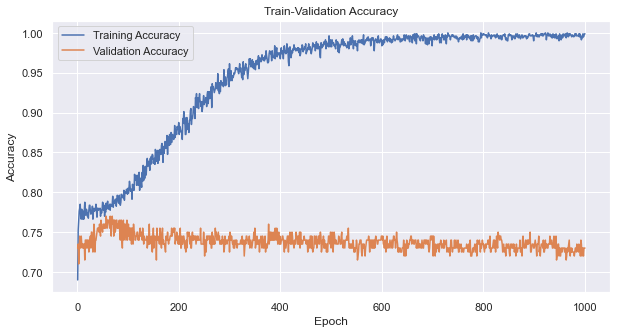

In [57]:
figure = plt.gcf()
figure.set_size_inches((10, 5))
plt.title('Train-Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(range(1, len(h.history['accuracy']) + 1), h.history['accuracy'])
plt.plot(range(1, len(h.history['val_accuracy']) + 1), h.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()


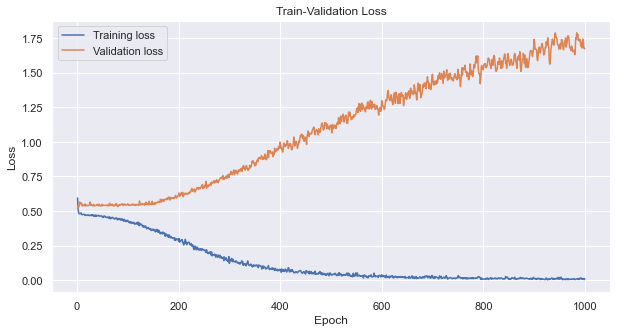

In [58]:
figure = plt.gcf()
figure.set_size_inches((10, 5))
plt.title('Train-Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(h.history['loss']) + 1), h.history['loss'])
plt.plot(range(1, len(h.history['val_loss']) + 1), h.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.show()


## 3rd Setting

In [59]:
import keras
from keras.layers import Dense, Flatten 
from  tensorflow.keras.utils import to_categorical


model = keras.models.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(2, activation='sigmoid')
])

loss = keras.losses.BinaryCrossentropy() # again without logits

#optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer= 'adam', metrics=metrics)

h = model.fit(x_train, y_train, batch_size= 32, epochs=1000, shuffle=False, verbose=1, validation_data = (x_test, y_test))



Epoch 1/1000
25/25 [==============================] - 1s 13ms/step - loss: 0.6113 - accuracy: 0.6712 - val_loss: 0.5655 - val_accuracy: 0.7100
Epoch 2/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.5570 - accuracy: 0.6988 - val_loss: 0.5352 - val_accuracy: 0.7250
Epoch 3/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.5138 - accuracy: 0.7425 - val_loss: 0.5168 - val_accuracy: 0.7300
Epoch 4/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.4832 - accuracy: 0.7738 - val_loss: 0.5215 - val_accuracy: 0.7250
Epoch 5/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.4696 - accuracy: 0.7738 - val_loss: 0.5268 - val_accuracy: 0.7350
Epoch 6/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.4656 - accuracy: 0.7875 - val_loss: 0.5272 - val_accuracy: 0.7300
Epoch 7/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.4551 - accuracy: 0.7750 - val_loss: 0.5294 - val_accuracy: 0.7300
Epoch

25/25 [==============================] - 0s 11ms/step - loss: 0.1379 - accuracy: 0.9538 - val_loss: 0.8738 - val_accuracy: 0.7300
Epoch 59/1000
25/25 [==============================] - 0s 9ms/step - loss: 0.1324 - accuracy: 0.9575 - val_loss: 0.8745 - val_accuracy: 0.7200
Epoch 60/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.1338 - accuracy: 0.9575 - val_loss: 0.8831 - val_accuracy: 0.7250
Epoch 61/1000
25/25 [==============================] - 0s 10ms/step - loss: 0.1313 - accuracy: 0.9563 - val_loss: 0.8751 - val_accuracy: 0.7200
Epoch 62/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.1297 - accuracy: 0.9563 - val_loss: 0.8984 - val_accuracy: 0.7250
Epoch 63/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.1233 - accuracy: 0.9663 - val_loss: 0.9149 - val_accuracy: 0.7250
Epoch 64/1000
25/25 [==============================] - 0s 8ms/step - loss: 0.1212 - accuracy: 0.9663 - val_loss: 0.9189 - val_accuracy: 0.7350
Epoch 65/10

25/25 [==============================] - 0s 9ms/step - loss: 0.0515 - accuracy: 0.9900 - val_loss: 1.5824 - val_accuracy: 0.7250
Epoch 116/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0562 - accuracy: 0.9837 - val_loss: 1.5864 - val_accuracy: 0.7200
Epoch 117/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0549 - accuracy: 0.9875 - val_loss: 1.6187 - val_accuracy: 0.7250
Epoch 118/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0468 - accuracy: 0.9875 - val_loss: 1.6165 - val_accuracy: 0.7150
Epoch 119/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0447 - accuracy: 0.9912 - val_loss: 1.5526 - val_accuracy: 0.7400
Epoch 120/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0456 - accuracy: 0.9837 - val_loss: 1.6907 - val_accuracy: 0.7100
Epoch 121/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0502 - accuracy: 0.9850 - val_loss: 1.6338 - val_accuracy: 0.7100
Epoch 1

Epoch 172/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 2.0854 - val_accuracy: 0.7100
Epoch 173/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 2.0855 - val_accuracy: 0.7150
Epoch 174/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 2.1120 - val_accuracy: 0.7100
Epoch 175/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 2.1296 - val_accuracy: 0.7100
Epoch 176/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 2.1619 - val_accuracy: 0.7100
Epoch 177/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0077 - accuracy: 0.9987 - val_loss: 2.1649 - val_accuracy: 0.7000
Epoch 178/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0081 - accuracy: 0.9987 - val_loss: 2.1586 - val_accuracy:

Epoch 229/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.5883 - val_accuracy: 0.7000
Epoch 230/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.5699 - val_accuracy: 0.7000
Epoch 231/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.5723 - val_accuracy: 0.7100
Epoch 232/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 2.6038 - val_accuracy: 0.7100
Epoch 233/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 2.5733 - val_accuracy: 0.7000
Epoch 234/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0031 - accuracy: 0.9987 - val_loss: 2.5928 - val_accuracy: 0.6950
Epoch 235/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 2.6240 - val_accuracy:

Epoch 286/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0252 - accuracy: 0.9900 - val_loss: 2.4413 - val_accuracy: 0.7150
Epoch 287/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0315 - accuracy: 0.9837 - val_loss: 2.4425 - val_accuracy: 0.7050
Epoch 288/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0386 - accuracy: 0.9887 - val_loss: 2.4397 - val_accuracy: 0.7100
Epoch 289/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0512 - accuracy: 0.9800 - val_loss: 2.5112 - val_accuracy: 0.7150
Epoch 290/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0336 - accuracy: 0.9887 - val_loss: 2.4340 - val_accuracy: 0.7150
Epoch 291/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0909 - accuracy: 0.9613 - val_loss: 2.1651 - val_accuracy: 0.7250
Epoch 292/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0288 - accuracy: 0.9912 - val_loss: 2.4044 - val_accuracy:

25/25 [==============================] - 0s 4ms/step - loss: 8.8374e-04 - accuracy: 1.0000 - val_loss: 2.8134 - val_accuracy: 0.6900
Epoch 343/1000
25/25 [==============================] - 0s 4ms/step - loss: 8.3923e-04 - accuracy: 1.0000 - val_loss: 2.8046 - val_accuracy: 0.6950
Epoch 344/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.8014 - val_accuracy: 0.6900
Epoch 345/1000
25/25 [==============================] - 0s 5ms/step - loss: 7.8470e-04 - accuracy: 1.0000 - val_loss: 2.8170 - val_accuracy: 0.6850
Epoch 346/1000
25/25 [==============================] - 0s 6ms/step - loss: 7.4082e-04 - accuracy: 1.0000 - val_loss: 2.8289 - val_accuracy: 0.6900
Epoch 347/1000
25/25 [==============================] - 0s 6ms/step - loss: 8.5218e-04 - accuracy: 1.0000 - val_loss: 2.8345 - val_accuracy: 0.6850
Epoch 348/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.8373 - val_accu

25/25 [==============================] - 0s 6ms/step - loss: 3.7815e-04 - accuracy: 1.0000 - val_loss: 3.0872 - val_accuracy: 0.6950
Epoch 398/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.8965e-04 - accuracy: 1.0000 - val_loss: 3.1030 - val_accuracy: 0.6950
Epoch 399/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.4424e-04 - accuracy: 1.0000 - val_loss: 3.1116 - val_accuracy: 0.6950
Epoch 400/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.9261e-04 - accuracy: 1.0000 - val_loss: 3.1196 - val_accuracy: 0.6900
Epoch 401/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.8185e-04 - accuracy: 1.0000 - val_loss: 3.1133 - val_accuracy: 0.6900
Epoch 402/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.2239e-04 - accuracy: 1.0000 - val_loss: 3.1122 - val_accuracy: 0.6850
Epoch 403/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.0146e-04 - accuracy: 1.0000 - val_loss: 3.1188 - 

25/25 [==============================] - 0s 5ms/step - loss: 2.1023e-04 - accuracy: 1.0000 - val_loss: 3.4248 - val_accuracy: 0.6850
Epoch 453/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.6290e-04 - accuracy: 1.0000 - val_loss: 3.4355 - val_accuracy: 0.6900
Epoch 454/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.8623e-04 - accuracy: 1.0000 - val_loss: 3.4294 - val_accuracy: 0.6900
Epoch 455/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.7813e-04 - accuracy: 1.0000 - val_loss: 3.4288 - val_accuracy: 0.6900
Epoch 456/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.1600e-04 - accuracy: 1.0000 - val_loss: 3.4438 - val_accuracy: 0.6950
Epoch 457/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.2442e-04 - accuracy: 1.0000 - val_loss: 3.4572 - val_accuracy: 0.6950
Epoch 458/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.2867e-04 - accuracy: 1.0000 - val_loss: 3.4558 - 

Epoch 508/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.5199e-04 - accuracy: 1.0000 - val_loss: 3.0782 - val_accuracy: 0.7050
Epoch 509/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.4382e-04 - accuracy: 1.0000 - val_loss: 3.0821 - val_accuracy: 0.7000
Epoch 510/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.3829e-04 - accuracy: 1.0000 - val_loss: 3.0899 - val_accuracy: 0.7050
Epoch 511/1000
25/25 [==============================] - 0s 6ms/step - loss: 9.7741e-04 - accuracy: 1.0000 - val_loss: 3.0339 - val_accuracy: 0.7050
Epoch 512/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.9497e-04 - accuracy: 1.0000 - val_loss: 3.0470 - val_accuracy: 0.7050
Epoch 513/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.2012e-04 - accuracy: 1.0000 - val_loss: 3.0606 - val_accuracy: 0.7000
Epoch 514/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.1721e-04 - accuracy: 1.0000 - val_

25/25 [==============================] - 0s 6ms/step - loss: 1.4963e-04 - accuracy: 1.0000 - val_loss: 3.4111 - val_accuracy: 0.6950
Epoch 564/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.6623e-04 - accuracy: 1.0000 - val_loss: 3.4146 - val_accuracy: 0.7050
Epoch 565/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.2311e-04 - accuracy: 1.0000 - val_loss: 3.4096 - val_accuracy: 0.7100
Epoch 566/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.5859e-04 - accuracy: 1.0000 - val_loss: 3.4190 - val_accuracy: 0.7000
Epoch 567/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.1984e-04 - accuracy: 1.0000 - val_loss: 3.4324 - val_accuracy: 0.7000
Epoch 568/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.6791e-04 - accuracy: 1.0000 - val_loss: 3.4409 - val_accuracy: 0.7100
Epoch 569/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4798e-04 - accuracy: 1.0000 - val_loss: 3.4436 - 

25/25 [==============================] - 0s 6ms/step - loss: 8.0088e-05 - accuracy: 1.0000 - val_loss: 3.6134 - val_accuracy: 0.7000
Epoch 619/1000
25/25 [==============================] - 0s 6ms/step - loss: 8.0987e-05 - accuracy: 1.0000 - val_loss: 3.6415 - val_accuracy: 0.7150
Epoch 620/1000
25/25 [==============================] - 0s 6ms/step - loss: 6.1127e-05 - accuracy: 1.0000 - val_loss: 3.6419 - val_accuracy: 0.7200
Epoch 621/1000
25/25 [==============================] - 0s 5ms/step - loss: 8.3985e-05 - accuracy: 1.0000 - val_loss: 3.6458 - val_accuracy: 0.7100
Epoch 622/1000
25/25 [==============================] - 0s 5ms/step - loss: 7.8445e-05 - accuracy: 1.0000 - val_loss: 3.6442 - val_accuracy: 0.7050
Epoch 623/1000
25/25 [==============================] - 0s 5ms/step - loss: 6.2767e-05 - accuracy: 1.0000 - val_loss: 3.6576 - val_accuracy: 0.7050
Epoch 624/1000
25/25 [==============================] - 0s 5ms/step - loss: 7.6032e-05 - accuracy: 1.0000 - val_loss: 3.6685 - 

25/25 [==============================] - 0s 5ms/step - loss: 3.8625e-05 - accuracy: 1.0000 - val_loss: 3.8799 - val_accuracy: 0.6850
Epoch 674/1000
25/25 [==============================] - 0s 6ms/step - loss: 5.1914e-05 - accuracy: 1.0000 - val_loss: 3.8855 - val_accuracy: 0.7000
Epoch 675/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.3005e-05 - accuracy: 1.0000 - val_loss: 3.8981 - val_accuracy: 0.6900
Epoch 676/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.6557e-05 - accuracy: 1.0000 - val_loss: 3.9158 - val_accuracy: 0.7000
Epoch 677/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.1864e-05 - accuracy: 1.0000 - val_loss: 3.9121 - val_accuracy: 0.7100
Epoch 678/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.2053e-05 - accuracy: 1.0000 - val_loss: 3.9100 - val_accuracy: 0.7050
Epoch 679/1000
25/25 [==============================] - 0s 6ms/step - loss: 5.0018e-05 - accuracy: 1.0000 - val_loss: 3.9196 - 

Epoch 729/1000
25/25 [==============================] - 0s 5ms/step - loss: 5.5023e-04 - accuracy: 1.0000 - val_loss: 3.2172 - val_accuracy: 0.6850
Epoch 730/1000
25/25 [==============================] - 0s 5ms/step - loss: 5.7004e-04 - accuracy: 1.0000 - val_loss: 3.2422 - val_accuracy: 0.6850
Epoch 731/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.1044e-04 - accuracy: 1.0000 - val_loss: 3.2873 - val_accuracy: 0.6900
Epoch 732/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.6433e-04 - accuracy: 1.0000 - val_loss: 3.2958 - val_accuracy: 0.6900
Epoch 733/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.7198e-04 - accuracy: 1.0000 - val_loss: 3.3099 - val_accuracy: 0.6900
Epoch 734/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.1760e-04 - accuracy: 1.0000 - val_loss: 3.3206 - val_accuracy: 0.6850
Epoch 735/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.3298e-04 - accuracy: 1.0000 - val_

25/25 [==============================] - 0s 5ms/step - loss: 1.0160e-04 - accuracy: 1.0000 - val_loss: 3.6948 - val_accuracy: 0.6800
Epoch 785/1000
25/25 [==============================] - 0s 5ms/step - loss: 5.6200e-05 - accuracy: 1.0000 - val_loss: 3.7136 - val_accuracy: 0.6850
Epoch 786/1000
25/25 [==============================] - 0s 5ms/step - loss: 8.8690e-05 - accuracy: 1.0000 - val_loss: 3.7126 - val_accuracy: 0.6850
Epoch 787/1000
25/25 [==============================] - 0s 6ms/step - loss: 7.1030e-05 - accuracy: 1.0000 - val_loss: 3.7098 - val_accuracy: 0.6850
Epoch 788/1000
25/25 [==============================] - 0s 5ms/step - loss: 6.5932e-05 - accuracy: 1.0000 - val_loss: 3.7174 - val_accuracy: 0.6850
Epoch 789/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.5330e-04 - accuracy: 1.0000 - val_loss: 3.7400 - val_accuracy: 0.6850
Epoch 790/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.0439e-04 - accuracy: 1.0000 - val_loss: 3.7175 - 

25/25 [==============================] - 0s 6ms/step - loss: 3.4649e-05 - accuracy: 1.0000 - val_loss: 3.9498 - val_accuracy: 0.6900
Epoch 840/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.0052e-05 - accuracy: 1.0000 - val_loss: 3.9587 - val_accuracy: 0.6900
Epoch 841/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.0442e-05 - accuracy: 1.0000 - val_loss: 3.9663 - val_accuracy: 0.6950
Epoch 842/1000
25/25 [==============================] - 0s 5ms/step - loss: 4.0246e-05 - accuracy: 1.0000 - val_loss: 3.9783 - val_accuracy: 0.6900
Epoch 843/1000
25/25 [==============================] - 0s 6ms/step - loss: 8.5871e-05 - accuracy: 1.0000 - val_loss: 3.9694 - val_accuracy: 0.6950
Epoch 844/1000
25/25 [==============================] - 0s 6ms/step - loss: 4.8355e-05 - accuracy: 1.0000 - val_loss: 3.9762 - val_accuracy: 0.6900
Epoch 845/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.8942e-05 - accuracy: 1.0000 - val_loss: 3.9819 - 

25/25 [==============================] - 0s 5ms/step - loss: 2.7153e-05 - accuracy: 1.0000 - val_loss: 4.1483 - val_accuracy: 0.6950
Epoch 895/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.8910e-05 - accuracy: 1.0000 - val_loss: 4.1578 - val_accuracy: 0.6950
Epoch 896/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.7751e-05 - accuracy: 1.0000 - val_loss: 4.1627 - val_accuracy: 0.6950
Epoch 897/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.3115e-05 - accuracy: 1.0000 - val_loss: 4.1568 - val_accuracy: 0.6950
Epoch 898/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.9803e-05 - accuracy: 1.0000 - val_loss: 4.1625 - val_accuracy: 0.6950
Epoch 899/1000
25/25 [==============================] - 0s 7ms/step - loss: 7.1155e-05 - accuracy: 1.0000 - val_loss: 4.1258 - val_accuracy: 0.6950
Epoch 900/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.0852e-05 - accuracy: 1.0000 - val_loss: 4.1433 - 

Epoch 950/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.1516e-04 - accuracy: 1.0000 - val_loss: 3.5309 - val_accuracy: 0.6950
Epoch 951/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.0741e-04 - accuracy: 1.0000 - val_loss: 3.5488 - val_accuracy: 0.6950
Epoch 952/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.1788e-04 - accuracy: 1.0000 - val_loss: 3.5631 - val_accuracy: 0.6900
Epoch 953/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.5251e-04 - accuracy: 1.0000 - val_loss: 3.5796 - val_accuracy: 0.6900
Epoch 954/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.3624e-04 - accuracy: 1.0000 - val_loss: 3.5840 - val_accuracy: 0.6950
Epoch 955/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4463e-04 - accuracy: 1.0000 - val_loss: 3.5906 - val_accuracy: 0.6850
Epoch 956/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.5227e-04 - accuracy: 1.0000 - val_

In [60]:
max(h.history['val_accuracy'])

0.7549999952316284

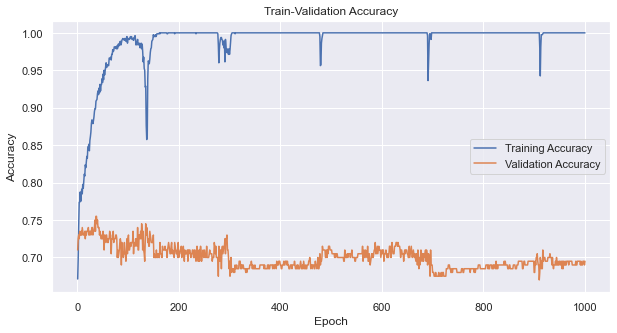

In [61]:
figure = plt.gcf()
figure.set_size_inches((10, 5))
plt.title('Train-Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(range(1, len(h.history['accuracy']) + 1), h.history['accuracy'])
plt.plot(range(1, len(h.history['val_accuracy']) + 1), h.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()


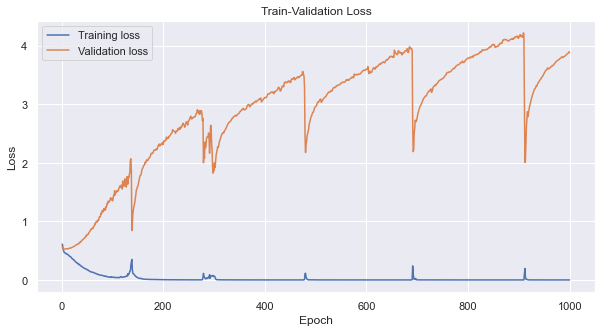

In [62]:
figure = plt.gcf()
figure.set_size_inches((10, 5))
plt.title('Train-Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(h.history['loss']) + 1), h.history['loss'])
plt.plot(range(1, len(h.history['val_loss']) + 1), h.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.show()


## 4th Setting

In [63]:
import keras
from keras.layers import Dense, Flatten 
from  tensorflow.keras.utils import to_categorical


model = keras.models.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(2, activation='sigmoid')
])

loss = keras.losses.BinaryCrossentropy() # again without logits

#optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer= 'adam', metrics=metrics)

h = model.fit(x_train, y_train, batch_size= 32, epochs=1000, shuffle=False, verbose=1, validation_data = (x_test, y_test))



Epoch 1/1000
25/25 [==============================] - 1s 15ms/step - loss: 0.6049 - accuracy: 0.6888 - val_loss: 0.5618 - val_accuracy: 0.7100
Epoch 2/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.5447 - accuracy: 0.6975 - val_loss: 0.5251 - val_accuracy: 0.7150
Epoch 3/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.4934 - accuracy: 0.7600 - val_loss: 0.5208 - val_accuracy: 0.7400
Epoch 4/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4784 - accuracy: 0.7700 - val_loss: 0.5287 - val_accuracy: 0.7500
Epoch 5/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.4634 - accuracy: 0.7875 - val_loss: 0.5330 - val_accuracy: 0.7500
Epoch 6/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4586 - accuracy: 0.7925 - val_loss: 0.5311 - val_accuracy: 0.7350
Epoch 7/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4477 - accuracy: 0.7912 - val_loss: 0.5376 - val_accuracy: 0.7550
Epoch

25/25 [==============================] - 0s 7ms/step - loss: 0.0457 - accuracy: 0.9850 - val_loss: 1.6516 - val_accuracy: 0.7350
Epoch 59/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0476 - accuracy: 0.9875 - val_loss: 1.6730 - val_accuracy: 0.7450
Epoch 60/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0520 - accuracy: 0.9800 - val_loss: 1.6083 - val_accuracy: 0.7400
Epoch 61/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0586 - accuracy: 0.9800 - val_loss: 1.6895 - val_accuracy: 0.7350
Epoch 62/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0520 - accuracy: 0.9875 - val_loss: 1.7350 - val_accuracy: 0.7300
Epoch 63/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0424 - accuracy: 0.9875 - val_loss: 1.6833 - val_accuracy: 0.7100
Epoch 64/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0906 - accuracy: 0.9675 - val_loss: 1.6119 - val_accuracy: 0.7350
Epoch 65/1000

25/25 [==============================] - 0s 6ms/step - loss: 9.7320e-04 - accuracy: 1.0000 - val_loss: 2.8190 - val_accuracy: 0.7100
Epoch 116/1000
25/25 [==============================] - 0s 6ms/step - loss: 8.9315e-04 - accuracy: 1.0000 - val_loss: 2.8198 - val_accuracy: 0.7100
Epoch 117/1000
25/25 [==============================] - 0s 6ms/step - loss: 7.4752e-04 - accuracy: 1.0000 - val_loss: 2.8345 - val_accuracy: 0.6850
Epoch 118/1000
25/25 [==============================] - 0s 6ms/step - loss: 9.4923e-04 - accuracy: 1.0000 - val_loss: 2.8534 - val_accuracy: 0.7000
Epoch 119/1000
25/25 [==============================] - 0s 6ms/step - loss: 9.4760e-04 - accuracy: 1.0000 - val_loss: 2.8929 - val_accuracy: 0.6900
Epoch 120/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 0.9987 - val_loss: 2.8869 - val_accuracy: 0.6950
Epoch 121/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 2.8915 - val_accu

25/25 [==============================] - 0s 6ms/step - loss: 6.4818e-04 - accuracy: 1.0000 - val_loss: 3.0372 - val_accuracy: 0.7000
Epoch 172/1000
25/25 [==============================] - 0s 6ms/step - loss: 6.7638e-04 - accuracy: 1.0000 - val_loss: 3.0596 - val_accuracy: 0.7100
Epoch 173/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 3.0977 - val_accuracy: 0.7100
Epoch 174/1000
25/25 [==============================] - 0s 6ms/step - loss: 5.7761e-04 - accuracy: 1.0000 - val_loss: 3.1306 - val_accuracy: 0.7100
Epoch 175/1000
25/25 [==============================] - 0s 6ms/step - loss: 5.3674e-04 - accuracy: 1.0000 - val_loss: 3.1554 - val_accuracy: 0.7100
Epoch 176/1000
25/25 [==============================] - 0s 6ms/step - loss: 5.6445e-04 - accuracy: 1.0000 - val_loss: 3.1730 - val_accuracy: 0.7100
Epoch 177/1000
25/25 [==============================] - 0s 6ms/step - loss: 6.1565e-04 - accuracy: 1.0000 - val_loss: 3.1644 - val_

Epoch 227/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 2.6020 - val_accuracy: 0.7150
Epoch 228/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.6954 - val_accuracy: 0.6950
Epoch 229/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.7491 - val_accuracy: 0.6950
Epoch 230/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 2.7850 - val_accuracy: 0.7000
Epoch 231/1000
25/25 [==============================] - 0s 6ms/step - loss: 9.9509e-04 - accuracy: 1.0000 - val_loss: 2.8409 - val_accuracy: 0.6950
Epoch 232/1000
25/25 [==============================] - 0s 6ms/step - loss: 9.7033e-04 - accuracy: 1.0000 - val_loss: 2.8868 - val_accuracy: 0.6900
Epoch 233/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.9008 - val_a

Epoch 283/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.6554e-04 - accuracy: 1.0000 - val_loss: 3.5346 - val_accuracy: 0.6950
Epoch 284/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.4708e-04 - accuracy: 1.0000 - val_loss: 3.5570 - val_accuracy: 0.6950
Epoch 285/1000
25/25 [==============================] - 0s 5ms/step - loss: 5.6506e-04 - accuracy: 1.0000 - val_loss: 3.6664 - val_accuracy: 0.6950
Epoch 286/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.7911e-04 - accuracy: 1.0000 - val_loss: 3.6032 - val_accuracy: 0.7050
Epoch 287/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.5964e-04 - accuracy: 1.0000 - val_loss: 3.5667 - val_accuracy: 0.7050
Epoch 288/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.5890e-04 - accuracy: 1.0000 - val_loss: 3.5933 - val_accuracy: 0.7050
Epoch 289/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.7450e-04 - accuracy: 1.0000 - val_

Epoch 339/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.6903e-04 - accuracy: 1.0000 - val_loss: 3.6619 - val_accuracy: 0.7000
Epoch 340/1000
25/25 [==============================] - 0s 6ms/step - loss: 4.4814e-04 - accuracy: 1.0000 - val_loss: 3.7050 - val_accuracy: 0.7000
Epoch 341/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.9924e-04 - accuracy: 1.0000 - val_loss: 3.7034 - val_accuracy: 0.7000
Epoch 342/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0136 - accuracy: 0.9925 - val_loss: 3.1017 - val_accuracy: 0.7300
Epoch 343/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0182 - accuracy: 0.9937 - val_loss: 3.2116 - val_accuracy: 0.7000
Epoch 344/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0444 - accuracy: 0.9862 - val_loss: 3.1171 - val_accuracy: 0.6900
Epoch 345/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0368 - accuracy: 0.9837 - val_loss: 2.8748 - v

Epoch 395/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0171 - accuracy: 0.9937 - val_loss: 2.6823 - val_accuracy: 0.6800
Epoch 396/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0072 - accuracy: 0.9987 - val_loss: 2.8390 - val_accuracy: 0.7050
Epoch 397/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 2.9223 - val_accuracy: 0.7000
Epoch 398/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.9990 - val_accuracy: 0.7100
Epoch 399/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 3.0613 - val_accuracy: 0.7050
Epoch 400/1000
25/25 [==============================] - 0s 6ms/step - loss: 7.2570e-04 - accuracy: 1.0000 - val_loss: 3.1007 - val_accuracy: 0.7000
Epoch 401/1000
25/25 [==============================] - 0s 6ms/step - loss: 7.1395e-04 - accuracy: 1.0000 - val_loss: 3.1356 - val_a

25/25 [==============================] - 0s 6ms/step - loss: 1.4906e-04 - accuracy: 1.0000 - val_loss: 3.9450 - val_accuracy: 0.6900
Epoch 451/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.0764e-04 - accuracy: 1.0000 - val_loss: 3.9557 - val_accuracy: 0.6900
Epoch 452/1000
25/25 [==============================] - 0s 6ms/step - loss: 4.9372e-04 - accuracy: 1.0000 - val_loss: 3.8813 - val_accuracy: 0.7050
Epoch 453/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.7747e-04 - accuracy: 1.0000 - val_loss: 3.8563 - val_accuracy: 0.7100
Epoch 454/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.1551e-04 - accuracy: 1.0000 - val_loss: 3.8658 - val_accuracy: 0.7000
Epoch 455/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.1199e-04 - accuracy: 1.0000 - val_loss: 3.8821 - val_accuracy: 0.7100
Epoch 456/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.1071e-04 - accuracy: 1.0000 - val_loss: 3.8967 - 

Epoch 506/1000
25/25 [==============================] - 0s 6ms/step - loss: 9.9556e-05 - accuracy: 1.0000 - val_loss: 4.0000 - val_accuracy: 0.6750
Epoch 507/1000
25/25 [==============================] - 0s 6ms/step - loss: 8.7298e-05 - accuracy: 1.0000 - val_loss: 4.0070 - val_accuracy: 0.6750
Epoch 508/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0101 - accuracy: 0.9975 - val_loss: 3.9248 - val_accuracy: 0.7100
Epoch 509/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0359 - accuracy: 0.9875 - val_loss: 3.3524 - val_accuracy: 0.7050
Epoch 510/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0424 - accuracy: 0.9837 - val_loss: 3.0582 - val_accuracy: 0.6900
Epoch 511/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0235 - accuracy: 0.9900 - val_loss: 3.2781 - val_accuracy: 0.6800
Epoch 512/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0260 - accuracy: 0.9887 - val_loss: 3.1798 - val_a

Epoch 562/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 3.9641 - val_accuracy: 0.6950
Epoch 563/1000
25/25 [==============================] - 0s 6ms/step - loss: 7.0622e-04 - accuracy: 1.0000 - val_loss: 4.0688 - val_accuracy: 0.6900
Epoch 564/1000
25/25 [==============================] - 0s 6ms/step - loss: 5.1641e-04 - accuracy: 1.0000 - val_loss: 4.2067 - val_accuracy: 0.6900
Epoch 565/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.6947e-04 - accuracy: 1.0000 - val_loss: 4.2605 - val_accuracy: 0.6950
Epoch 566/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.3181e-04 - accuracy: 1.0000 - val_loss: 4.2876 - val_accuracy: 0.6950
Epoch 567/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.4424e-04 - accuracy: 1.0000 - val_loss: 4.3326 - val_accuracy: 0.6950
Epoch 568/1000
25/25 [==============================] - 0s 5ms/step - loss: 8.5587e-05 - accuracy: 1.0000 - val_loss

25/25 [==============================] - 0s 6ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 3.0466 - val_accuracy: 0.6950
Epoch 618/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.1086 - val_accuracy: 0.6850
Epoch 619/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 3.2114 - val_accuracy: 0.7100
Epoch 620/1000
25/25 [==============================] - 0s 5ms/step - loss: 8.2424e-04 - accuracy: 1.0000 - val_loss: 3.2638 - val_accuracy: 0.7050
Epoch 621/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 3.3418 - val_accuracy: 0.7000
Epoch 622/1000
25/25 [==============================] - 0s 5ms/step - loss: 8.9512e-04 - accuracy: 1.0000 - val_loss: 3.4422 - val_accuracy: 0.6950
Epoch 623/1000
25/25 [==============================] - 0s 6ms/step - loss: 5.2213e-04 - accuracy: 1.0000 - val_loss: 3.5457 - val_accuracy: 0.

Epoch 673/1000
25/25 [==============================] - 0s 6ms/step - loss: 9.3453e-05 - accuracy: 1.0000 - val_loss: 4.4687 - val_accuracy: 0.6900
Epoch 674/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.3402e-04 - accuracy: 1.0000 - val_loss: 4.4847 - val_accuracy: 0.6900
Epoch 675/1000
25/25 [==============================] - 0s 6ms/step - loss: 9.5384e-05 - accuracy: 1.0000 - val_loss: 4.4783 - val_accuracy: 0.6850
Epoch 676/1000
25/25 [==============================] - 0s 6ms/step - loss: 5.5474e-05 - accuracy: 1.0000 - val_loss: 4.4800 - val_accuracy: 0.6800
Epoch 677/1000
25/25 [==============================] - 0s 5ms/step - loss: 7.6174e-05 - accuracy: 1.0000 - val_loss: 4.4906 - val_accuracy: 0.6800
Epoch 678/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.3171e-04 - accuracy: 1.0000 - val_loss: 4.4982 - val_accuracy: 0.6700
Epoch 679/1000
25/25 [==============================] - 0s 6ms/step - loss: 6.6961e-05 - accuracy: 1.0000 - val_

25/25 [==============================] - 0s 6ms/step - loss: 0.0142 - accuracy: 0.9975 - val_loss: 2.7927 - val_accuracy: 0.6950
Epoch 729/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0272 - accuracy: 0.9937 - val_loss: 2.9002 - val_accuracy: 0.6900
Epoch 730/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0162 - accuracy: 0.9912 - val_loss: 3.1423 - val_accuracy: 0.6800
Epoch 731/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0214 - accuracy: 0.9925 - val_loss: 3.1031 - val_accuracy: 0.6750
Epoch 732/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0116 - accuracy: 0.9975 - val_loss: 3.2397 - val_accuracy: 0.7050
Epoch 733/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0071 - accuracy: 0.9962 - val_loss: 3.3028 - val_accuracy: 0.7050
Epoch 734/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 3.3315 - val_accuracy: 0.7050
Epoch 7

25/25 [==============================] - 0s 6ms/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 4.0201 - val_accuracy: 0.7050
Epoch 785/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0318 - accuracy: 0.9912 - val_loss: 3.8562 - val_accuracy: 0.7150
Epoch 786/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0117 - accuracy: 0.9975 - val_loss: 3.4024 - val_accuracy: 0.7100
Epoch 787/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0053 - accuracy: 0.9975 - val_loss: 3.5958 - val_accuracy: 0.6850
Epoch 788/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.7636 - val_accuracy: 0.6950
Epoch 789/1000
25/25 [==============================] - 0s 6ms/step - loss: 6.9253e-04 - accuracy: 1.0000 - val_loss: 3.8061 - val_accuracy: 0.6900
Epoch 790/1000
25/25 [==============================] - 0s 5ms/step - loss: 3.1752e-04 - accuracy: 1.0000 - val_loss: 3.8226 - val_accuracy: 0.6850

25/25 [==============================] - 0s 6ms/step - loss: 6.7196e-05 - accuracy: 1.0000 - val_loss: 4.5340 - val_accuracy: 0.6850
Epoch 840/1000
25/25 [==============================] - 0s 6ms/step - loss: 5.9082e-05 - accuracy: 1.0000 - val_loss: 4.5541 - val_accuracy: 0.6850
Epoch 841/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.1708e-04 - accuracy: 1.0000 - val_loss: 4.5806 - val_accuracy: 0.6900
Epoch 842/1000
25/25 [==============================] - 0s 6ms/step - loss: 4.4660e-05 - accuracy: 1.0000 - val_loss: 4.5916 - val_accuracy: 0.6950
Epoch 843/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.9086e-05 - accuracy: 1.0000 - val_loss: 4.5976 - val_accuracy: 0.6900
Epoch 844/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.6651e-05 - accuracy: 1.0000 - val_loss: 4.6074 - val_accuracy: 0.6900
Epoch 845/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.1196e-05 - accuracy: 1.0000 - val_loss: 4.6188 - 

25/25 [==============================] - 0s 6ms/step - loss: 0.0780 - accuracy: 0.9787 - val_loss: 3.3760 - val_accuracy: 0.7100
Epoch 895/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0826 - accuracy: 0.9700 - val_loss: 2.8474 - val_accuracy: 0.6950
Epoch 896/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.1016 - accuracy: 0.9650 - val_loss: 2.5963 - val_accuracy: 0.6900
Epoch 897/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0971 - accuracy: 0.9700 - val_loss: 2.4201 - val_accuracy: 0.7400
Epoch 898/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0171 - accuracy: 0.9950 - val_loss: 2.7015 - val_accuracy: 0.7300
Epoch 899/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0094 - accuracy: 0.9987 - val_loss: 2.9335 - val_accuracy: 0.7150
Epoch 900/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0079 - accuracy: 0.9962 - val_loss: 3.1914 - val_accuracy: 0.7050
Epoch 9

25/25 [==============================] - 0s 6ms/step - loss: 0.0175 - accuracy: 0.9950 - val_loss: 4.2011 - val_accuracy: 0.7050
Epoch 951/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0924 - accuracy: 0.9850 - val_loss: 4.1961 - val_accuracy: 0.7100
Epoch 952/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 3.3983 - val_accuracy: 0.7250
Epoch 953/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 3.6269 - val_accuracy: 0.7100
Epoch 954/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 3.6683 - val_accuracy: 0.7300
Epoch 955/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0044 - accuracy: 0.9975 - val_loss: 3.5618 - val_accuracy: 0.7100
Epoch 956/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.5454 - val_accuracy: 0.7200
Epoch 9

In [64]:
max(h.history['val_accuracy'])

0.7749999761581421

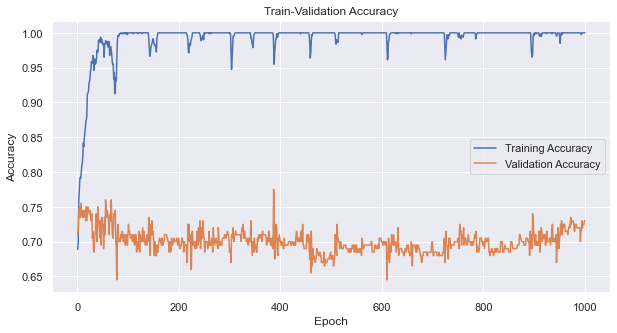

In [65]:
figure = plt.gcf()
figure.set_size_inches((10, 5))
plt.title('Train-Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(range(1, len(h.history['accuracy']) + 1), h.history['accuracy'])
plt.plot(range(1, len(h.history['val_accuracy']) + 1), h.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()


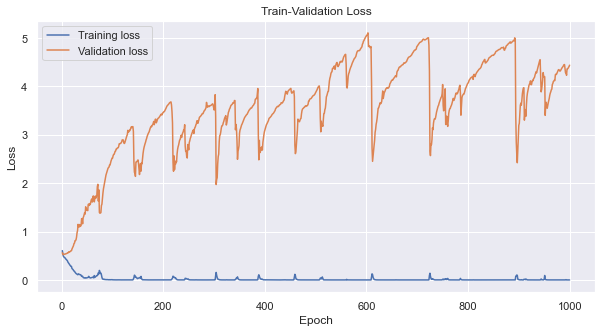

In [66]:
figure = plt.gcf()
figure.set_size_inches((10, 5))
plt.title('Train-Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(h.history['loss']) + 1), h.history['loss'])
plt.plot(range(1, len(h.history['val_loss']) + 1), h.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.show()


## 5th Setting

In [67]:
import keras
from keras.layers import Dense, Flatten 
from  tensorflow.keras.utils import to_categorical



model = keras.models.Sequential([
  keras.layers.Dense(20, input_shape=(20,), activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(2, activation='sigmoid')
])

loss = keras.losses.BinaryCrossentropy() # again without logits

#optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer= 'adam', metrics=metrics)

h = model.fit(x_train, y_train, batch_size= 32, epochs=1000, shuffle=False, verbose=1, validation_data = (x_test, y_test))



Epoch 1/1000
25/25 [==============================] - 1s 13ms/step - loss: 0.6083 - accuracy: 0.6850 - val_loss: 0.5714 - val_accuracy: 0.7100
Epoch 2/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.5379 - accuracy: 0.7225 - val_loss: 0.5564 - val_accuracy: 0.7350
Epoch 3/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.5091 - accuracy: 0.7638 - val_loss: 0.5570 - val_accuracy: 0.7100
Epoch 4/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.4933 - accuracy: 0.7725 - val_loss: 0.5533 - val_accuracy: 0.7200
Epoch 5/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.4783 - accuracy: 0.7800 - val_loss: 0.5536 - val_accuracy: 0.7050
Epoch 6/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4672 - accuracy: 0.7775 - val_loss: 0.5541 - val_accuracy: 0.7050
Epoch 7/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.4555 - accuracy: 0.7875 - val_loss: 0.5519 - val_accuracy: 0.7250
Epoch

25/25 [==============================] - 0s 7ms/step - loss: 0.0586 - accuracy: 0.9862 - val_loss: 1.4082 - val_accuracy: 0.7000
Epoch 59/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0493 - accuracy: 0.9900 - val_loss: 1.4476 - val_accuracy: 0.7250
Epoch 60/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0468 - accuracy: 0.9900 - val_loss: 1.5188 - val_accuracy: 0.7250
Epoch 61/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0454 - accuracy: 0.9925 - val_loss: 1.5089 - val_accuracy: 0.7200
Epoch 62/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0349 - accuracy: 0.9950 - val_loss: 1.5774 - val_accuracy: 0.7200
Epoch 63/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0361 - accuracy: 0.9937 - val_loss: 1.6218 - val_accuracy: 0.7100
Epoch 64/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0335 - accuracy: 0.9962 - val_loss: 1.6406 - val_accuracy: 0.7100
Epoch 65/1000

25/25 [==============================] - 0s 6ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 2.2061 - val_accuracy: 0.7200
Epoch 116/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 2.2341 - val_accuracy: 0.7150
Epoch 117/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 2.2404 - val_accuracy: 0.7150
Epoch 118/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 2.2609 - val_accuracy: 0.7150
Epoch 119/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 2.2865 - val_accuracy: 0.7150
Epoch 120/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 2.2927 - val_accuracy: 0.7150
Epoch 121/1000
25/25 [==============================] - 0s 7ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 2.2999 - val_accuracy: 0.7150
Epoch 1

Epoch 172/1000
25/25 [==============================] - 0s 6ms/step - loss: 9.2218e-04 - accuracy: 1.0000 - val_loss: 2.8535 - val_accuracy: 0.7150
Epoch 173/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.8624 - val_accuracy: 0.7150
Epoch 174/1000
25/25 [==============================] - 0s 6ms/step - loss: 9.1512e-04 - accuracy: 1.0000 - val_loss: 2.8743 - val_accuracy: 0.7100
Epoch 175/1000
25/25 [==============================] - 0s 6ms/step - loss: 8.8754e-04 - accuracy: 1.0000 - val_loss: 2.8911 - val_accuracy: 0.7100
Epoch 176/1000
25/25 [==============================] - 0s 6ms/step - loss: 8.8235e-04 - accuracy: 1.0000 - val_loss: 2.8964 - val_accuracy: 0.7150
Epoch 177/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 2.9065 - val_accuracy: 0.7100
Epoch 178/1000
25/25 [==============================] - 0s 6ms/step - loss: 9.1444e-04 - accuracy: 1.0000 - val_loss: 2.

25/25 [==============================] - 0s 6ms/step - loss: 2.5741e-04 - accuracy: 1.0000 - val_loss: 3.3283 - val_accuracy: 0.7150
Epoch 228/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.4130e-04 - accuracy: 1.0000 - val_loss: 3.3306 - val_accuracy: 0.7150
Epoch 229/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.4975e-04 - accuracy: 1.0000 - val_loss: 3.3447 - val_accuracy: 0.7150
Epoch 230/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.8350e-04 - accuracy: 1.0000 - val_loss: 3.3488 - val_accuracy: 0.7150
Epoch 231/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.1282e-04 - accuracy: 1.0000 - val_loss: 3.3596 - val_accuracy: 0.7100
Epoch 232/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.2919e-04 - accuracy: 1.0000 - val_loss: 3.3717 - val_accuracy: 0.7100
Epoch 233/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.3894e-04 - accuracy: 1.0000 - val_loss: 3.3928 - 

25/25 [==============================] - 0s 6ms/step - loss: 7.9786e-05 - accuracy: 1.0000 - val_loss: 3.7082 - val_accuracy: 0.7100
Epoch 283/1000
25/25 [==============================] - 0s 6ms/step - loss: 8.6173e-05 - accuracy: 1.0000 - val_loss: 3.7200 - val_accuracy: 0.7100
Epoch 284/1000
25/25 [==============================] - 0s 5ms/step - loss: 8.7961e-05 - accuracy: 1.0000 - val_loss: 3.7351 - val_accuracy: 0.7100
Epoch 285/1000
25/25 [==============================] - 0s 6ms/step - loss: 9.0430e-05 - accuracy: 1.0000 - val_loss: 3.7334 - val_accuracy: 0.7100
Epoch 286/1000
25/25 [==============================] - 0s 6ms/step - loss: 9.0145e-05 - accuracy: 1.0000 - val_loss: 3.7267 - val_accuracy: 0.7100
Epoch 287/1000
25/25 [==============================] - 0s 6ms/step - loss: 7.5705e-05 - accuracy: 1.0000 - val_loss: 3.7367 - val_accuracy: 0.7100
Epoch 288/1000
25/25 [==============================] - 0s 6ms/step - loss: 8.9488e-05 - accuracy: 1.0000 - val_loss: 3.7473 - 

25/25 [==============================] - 0s 5ms/step - loss: 4.1099e-05 - accuracy: 1.0000 - val_loss: 4.0740 - val_accuracy: 0.7100
Epoch 338/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.9355e-05 - accuracy: 1.0000 - val_loss: 4.0810 - val_accuracy: 0.7100
Epoch 339/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.7195e-05 - accuracy: 1.0000 - val_loss: 4.0820 - val_accuracy: 0.7100
Epoch 340/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.2039e-05 - accuracy: 1.0000 - val_loss: 4.1048 - val_accuracy: 0.7100
Epoch 341/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.1249e-05 - accuracy: 1.0000 - val_loss: 4.0973 - val_accuracy: 0.7100
Epoch 342/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.3083e-05 - accuracy: 1.0000 - val_loss: 4.1079 - val_accuracy: 0.7100
Epoch 343/1000
25/25 [==============================] - 0s 6ms/step - loss: 6.9802e-05 - accuracy: 1.0000 - val_loss: 4.0754 - 

25/25 [==============================] - 0s 6ms/step - loss: 0.1489 - accuracy: 0.9475 - val_loss: 1.4527 - val_accuracy: 0.7400
Epoch 393/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0669 - accuracy: 0.9837 - val_loss: 1.7710 - val_accuracy: 0.7250
Epoch 394/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0322 - accuracy: 0.9975 - val_loss: 1.9365 - val_accuracy: 0.7050
Epoch 395/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0227 - accuracy: 0.9975 - val_loss: 2.0742 - val_accuracy: 0.6900
Epoch 396/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 2.1428 - val_accuracy: 0.6950
Epoch 397/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 2.2486 - val_accuracy: 0.7000
Epoch 398/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 2.3345 - val_accuracy: 0.6900
Epoch 3

25/25 [==============================] - 0s 6ms/step - loss: 4.4366e-04 - accuracy: 1.0000 - val_loss: 3.2841 - val_accuracy: 0.7000
Epoch 449/1000
25/25 [==============================] - 0s 6ms/step - loss: 4.5317e-04 - accuracy: 1.0000 - val_loss: 3.2911 - val_accuracy: 0.7000
Epoch 450/1000
25/25 [==============================] - 0s 6ms/step - loss: 4.8102e-04 - accuracy: 1.0000 - val_loss: 3.2993 - val_accuracy: 0.7050
Epoch 451/1000
25/25 [==============================] - 0s 6ms/step - loss: 4.3716e-04 - accuracy: 1.0000 - val_loss: 3.3002 - val_accuracy: 0.7000
Epoch 452/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.9016e-04 - accuracy: 1.0000 - val_loss: 3.3084 - val_accuracy: 0.7000
Epoch 453/1000
25/25 [==============================] - 0s 6ms/step - loss: 4.0441e-04 - accuracy: 1.0000 - val_loss: 3.3127 - val_accuracy: 0.6950
Epoch 454/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.2308e-04 - accuracy: 1.0000 - val_loss: 3.3328 - 

25/25 [==============================] - 0s 6ms/step - loss: 8.7647e-05 - accuracy: 1.0000 - val_loss: 3.7458 - val_accuracy: 0.7050
Epoch 504/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.3093e-04 - accuracy: 1.0000 - val_loss: 3.7478 - val_accuracy: 0.7000
Epoch 505/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.2228e-04 - accuracy: 1.0000 - val_loss: 3.7603 - val_accuracy: 0.7000
Epoch 506/1000
25/25 [==============================] - 0s 6ms/step - loss: 8.8497e-05 - accuracy: 1.0000 - val_loss: 3.7675 - val_accuracy: 0.7000
Epoch 507/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.1085e-04 - accuracy: 1.0000 - val_loss: 3.7818 - val_accuracy: 0.7000
Epoch 508/1000
25/25 [==============================] - 0s 6ms/step - loss: 9.7080e-05 - accuracy: 1.0000 - val_loss: 3.7933 - val_accuracy: 0.7000
Epoch 509/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.2851e-04 - accuracy: 1.0000 - val_loss: 3.7824 - 

25/25 [==============================] - 0s 6ms/step - loss: 5.0195e-05 - accuracy: 1.0000 - val_loss: 3.9622 - val_accuracy: 0.7000
Epoch 559/1000
25/25 [==============================] - 0s 6ms/step - loss: 6.3241e-05 - accuracy: 1.0000 - val_loss: 3.9740 - val_accuracy: 0.7000
Epoch 560/1000
25/25 [==============================] - 0s 6ms/step - loss: 6.9364e-05 - accuracy: 1.0000 - val_loss: 3.9861 - val_accuracy: 0.7000
Epoch 561/1000
25/25 [==============================] - 0s 6ms/step - loss: 6.4213e-05 - accuracy: 1.0000 - val_loss: 3.9741 - val_accuracy: 0.7000
Epoch 562/1000
25/25 [==============================] - 0s 6ms/step - loss: 6.7385e-05 - accuracy: 1.0000 - val_loss: 3.9704 - val_accuracy: 0.7000
Epoch 563/1000
25/25 [==============================] - 0s 6ms/step - loss: 6.0038e-05 - accuracy: 1.0000 - val_loss: 3.9755 - val_accuracy: 0.7100
Epoch 564/1000
25/25 [==============================] - 0s 6ms/step - loss: 7.5260e-05 - accuracy: 1.0000 - val_loss: 3.9899 - 

25/25 [==============================] - 0s 6ms/step - loss: 2.6168e-05 - accuracy: 1.0000 - val_loss: 4.2891 - val_accuracy: 0.7000
Epoch 614/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.9177e-05 - accuracy: 1.0000 - val_loss: 4.2994 - val_accuracy: 0.7050
Epoch 615/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.1802e-05 - accuracy: 1.0000 - val_loss: 4.3147 - val_accuracy: 0.7050
Epoch 616/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.3955e-05 - accuracy: 1.0000 - val_loss: 4.3265 - val_accuracy: 0.7000
Epoch 617/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.6710e-05 - accuracy: 1.0000 - val_loss: 4.3334 - val_accuracy: 0.7050
Epoch 618/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.9805e-05 - accuracy: 1.0000 - val_loss: 4.3399 - val_accuracy: 0.7100
Epoch 619/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.9100e-05 - accuracy: 1.0000 - val_loss: 4.3435 - 

25/25 [==============================] - 0s 6ms/step - loss: 9.0319e-06 - accuracy: 1.0000 - val_loss: 4.5806 - val_accuracy: 0.7050
Epoch 669/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.0714e-05 - accuracy: 1.0000 - val_loss: 4.5896 - val_accuracy: 0.7050
Epoch 670/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.0572e-05 - accuracy: 1.0000 - val_loss: 4.5797 - val_accuracy: 0.6900
Epoch 671/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.4358e-05 - accuracy: 1.0000 - val_loss: 4.5848 - val_accuracy: 0.6900
Epoch 672/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.2191e-05 - accuracy: 1.0000 - val_loss: 4.5909 - val_accuracy: 0.7050
Epoch 673/1000
25/25 [==============================] - 0s 5ms/step - loss: 1.0931e-05 - accuracy: 1.0000 - val_loss: 4.5855 - val_accuracy: 0.7100
Epoch 674/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.1321e-05 - accuracy: 1.0000 - val_loss: 4.5881 - 

25/25 [==============================] - 0s 6ms/step - loss: 5.5732e-06 - accuracy: 1.0000 - val_loss: 4.8487 - val_accuracy: 0.7050
Epoch 724/1000
25/25 [==============================] - 0s 5ms/step - loss: 5.1877e-06 - accuracy: 1.0000 - val_loss: 4.8472 - val_accuracy: 0.7000
Epoch 725/1000
25/25 [==============================] - 0s 6ms/step - loss: 6.0591e-06 - accuracy: 1.0000 - val_loss: 4.8493 - val_accuracy: 0.7050
Epoch 726/1000
25/25 [==============================] - 0s 6ms/step - loss: 5.1072e-06 - accuracy: 1.0000 - val_loss: 4.8532 - val_accuracy: 0.7100
Epoch 727/1000
25/25 [==============================] - 0s 6ms/step - loss: 7.5854e-06 - accuracy: 1.0000 - val_loss: 4.8467 - val_accuracy: 0.6950
Epoch 728/1000
25/25 [==============================] - 0s 6ms/step - loss: 5.0628e-06 - accuracy: 1.0000 - val_loss: 4.8694 - val_accuracy: 0.6950
Epoch 729/1000
25/25 [==============================] - 0s 6ms/step - loss: 4.5512e-06 - accuracy: 1.0000 - val_loss: 4.8778 - 

25/25 [==============================] - 0s 6ms/step - loss: 2.6291e-06 - accuracy: 1.0000 - val_loss: 5.1261 - val_accuracy: 0.7050
Epoch 779/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.4564e-06 - accuracy: 1.0000 - val_loss: 5.1213 - val_accuracy: 0.7050
Epoch 780/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.2994e-06 - accuracy: 1.0000 - val_loss: 5.1286 - val_accuracy: 0.7050
Epoch 781/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.2423e-06 - accuracy: 1.0000 - val_loss: 5.1350 - val_accuracy: 0.7050
Epoch 782/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.6988e-06 - accuracy: 1.0000 - val_loss: 5.1469 - val_accuracy: 0.7000
Epoch 783/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.9684e-06 - accuracy: 1.0000 - val_loss: 5.1329 - val_accuracy: 0.7000
Epoch 784/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.7208e-06 - accuracy: 1.0000 - val_loss: 5.1337 - 

25/25 [==============================] - 0s 6ms/step - loss: 8.1269e-05 - accuracy: 1.0000 - val_loss: 4.4443 - val_accuracy: 0.6800
Epoch 834/1000
25/25 [==============================] - 0s 6ms/step - loss: 7.0614e-05 - accuracy: 1.0000 - val_loss: 4.4680 - val_accuracy: 0.6800
Epoch 835/1000
25/25 [==============================] - 0s 6ms/step - loss: 6.3594e-05 - accuracy: 1.0000 - val_loss: 4.4902 - val_accuracy: 0.6800
Epoch 836/1000
25/25 [==============================] - 0s 6ms/step - loss: 5.7680e-05 - accuracy: 1.0000 - val_loss: 4.5096 - val_accuracy: 0.6800
Epoch 837/1000
25/25 [==============================] - 0s 6ms/step - loss: 5.4985e-05 - accuracy: 1.0000 - val_loss: 4.5342 - val_accuracy: 0.6800
Epoch 838/1000
25/25 [==============================] - 0s 6ms/step - loss: 6.7539e-05 - accuracy: 1.0000 - val_loss: 4.5625 - val_accuracy: 0.6800
Epoch 839/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.7979e-05 - accuracy: 1.0000 - val_loss: 4.5911 - 

25/25 [==============================] - 0s 6ms/step - loss: 2.2310e-05 - accuracy: 1.0000 - val_loss: 4.9100 - val_accuracy: 0.6850
Epoch 889/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.8670e-05 - accuracy: 1.0000 - val_loss: 4.9222 - val_accuracy: 0.6850
Epoch 890/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.0059e-05 - accuracy: 1.0000 - val_loss: 4.9184 - val_accuracy: 0.6850
Epoch 891/1000
25/25 [==============================] - 0s 6ms/step - loss: 3.9138e-05 - accuracy: 1.0000 - val_loss: 4.8896 - val_accuracy: 0.6900
Epoch 892/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.6571e-05 - accuracy: 1.0000 - val_loss: 4.8950 - val_accuracy: 0.6900
Epoch 893/1000
25/25 [==============================] - 0s 5ms/step - loss: 2.4503e-05 - accuracy: 1.0000 - val_loss: 4.9080 - val_accuracy: 0.6850
Epoch 894/1000
25/25 [==============================] - 0s 6ms/step - loss: 2.0162e-05 - accuracy: 1.0000 - val_loss: 4.9097 - 

25/25 [==============================] - 0s 6ms/step - loss: 1.1298e-05 - accuracy: 1.0000 - val_loss: 5.1304 - val_accuracy: 0.6850
Epoch 944/1000
25/25 [==============================] - 0s 5ms/step - loss: 9.6403e-06 - accuracy: 1.0000 - val_loss: 5.1297 - val_accuracy: 0.6850
Epoch 945/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.2064e-05 - accuracy: 1.0000 - val_loss: 5.1243 - val_accuracy: 0.6900
Epoch 946/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.8386e-05 - accuracy: 1.0000 - val_loss: 5.1023 - val_accuracy: 0.6900
Epoch 947/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.0625e-05 - accuracy: 1.0000 - val_loss: 5.1067 - val_accuracy: 0.6850
Epoch 948/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.1604e-05 - accuracy: 1.0000 - val_loss: 5.1150 - val_accuracy: 0.6900
Epoch 949/1000
25/25 [==============================] - 0s 6ms/step - loss: 6.8664e-06 - accuracy: 1.0000 - val_loss: 5.1275 - 

25/25 [==============================] - 0s 6ms/step - loss: 6.0212e-06 - accuracy: 1.0000 - val_loss: 5.2836 - val_accuracy: 0.6850
Epoch 999/1000
25/25 [==============================] - 0s 6ms/step - loss: 5.0630e-06 - accuracy: 1.0000 - val_loss: 5.2986 - val_accuracy: 0.6850
Epoch 1000/1000
25/25 [==============================] - 0s 6ms/step - loss: 9.3891e-06 - accuracy: 1.0000 - val_loss: 5.2794 - val_accuracy: 0.6900


In [68]:
max(h.history['val_accuracy'])

0.7649999856948853

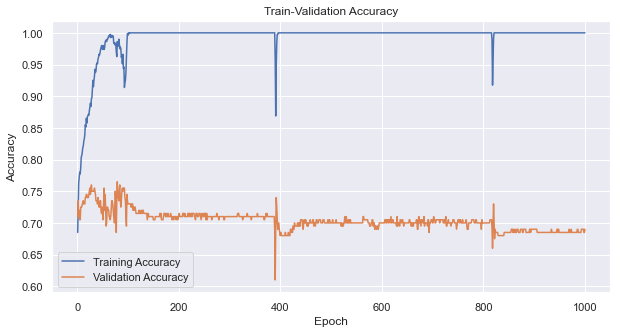

In [69]:
figure = plt.gcf()
figure.set_size_inches((10, 5))
plt.title('Train-Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(range(1, len(h.history['accuracy']) + 1), h.history['accuracy'])
plt.plot(range(1, len(h.history['val_accuracy']) + 1), h.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()


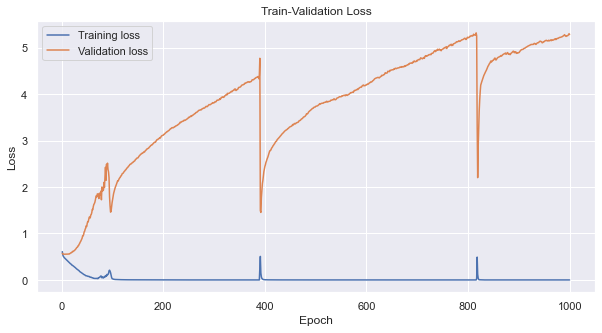

In [70]:
figure = plt.gcf()
figure.set_size_inches((10, 5))
plt.title('Train-Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(h.history['loss']) + 1), h.history['loss'])
plt.plot(range(1, len(h.history['val_loss']) + 1), h.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.show()
